In [112]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [113]:
df= pd.read_excel("\MBAN- Schulich\MBAN- Sem 1\Artificial Intelligence- MMAI- 5000\Project 1- Proposal stage\AI-Human-PewData.xlsx", engine= 'openpyxl')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\961354680.py:1: SyntaxWarning: invalid escape sequence '\M'
  df= pd.read_excel("\MBAN- Schulich\MBAN- Sem 1\Artificial Intelligence- MMAI- 5000\Project 1- Proposal stage\AI-Human-PewData.xlsx", engine= 'openpyxl')


In [114]:
print(df.head())

   Unnamed: 0    QKEY INTERVIEW_START_W99   INTERVIEW_END_W99 DEVICE_TYPE_W99  \
0           0  100260 2021-11-03 14:25:27 2021-11-03 14:45:34       Laptop/PC   
1           1  100314 2021-11-04 12:35:35 2021-11-04 12:55:29      Smartphone   
2           2  100363 2021-11-03 20:23:43 2021-11-03 20:36:24      Smartphone   
3           3  100598 2021-11-02 13:01:05 2021-11-04 12:37:42       Laptop/PC   
4           4  100637 2021-11-02 12:32:58 2021-11-02 12:46:23       Laptop/PC   

  LANG_W99 FORM_W99    XTABLET_W99        TECH1_W99  \
0  English   Form 2  Non-tablet HH              NaN   
1  English   Form 1  Non-tablet HH  Mostly positive   
2  English   Form 1  Non-tablet HH  Mostly positive   
3  English   Form 2  Non-tablet HH              NaN   
4  English   Form 2  Non-tablet HH              NaN   

                               SC1_W99  ...       F_PARTYLN_FINAL  \
0                      Mostly positive  ...                   NaN   
1                                  NaN  ... 

In [115]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

missing_values, duplicates


(Unnamed: 0               0
 QKEY                     0
 INTERVIEW_START_W99      0
 INTERVIEW_END_W99        0
 DEVICE_TYPE_W99          0
                       ... 
 F_IDEO                   0
 F_INTFREQ              173
 F_VOLSUM                 0
 F_INC_TIER2              0
 WEIGHT_W99               0
 Length: 215, dtype: int64,
 0)

In [116]:
# Drop duplicate rows
df = df.drop_duplicates()

# Impute missing values with the mode (most frequent value) for categorical variables
categorical_columns = ['F_AGECAT', 'F_EDUCCAT2', 'F_MARITAL', 'F_RELIG', 'F_INC_SDT1', 'GENEV3_W99']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again for missing values
df.isnull().sum()

Unnamed: 0               0
QKEY                     0
INTERVIEW_START_W99      0
INTERVIEW_END_W99        0
DEVICE_TYPE_W99          0
                      ... 
F_IDEO                   0
F_INTFREQ              173
F_VOLSUM                 0
F_INC_TIER2              0
WEIGHT_W99               0
Length: 215, dtype: int64

In [117]:
# see how age, education, gender, religion, income impact on overall public opinions on science, AI and gene editing
selected_columns = [
    'F_AGECAT', 'F_RELIG', 'F_GENDER', 'F_EDUCCAT', 'F_INC_SDT1', 
    'GENEV2_W99', 'SC1_W99', 'CNCEXC_W99', 'GENEV3_W99'
]
df1 = df[selected_columns]
df1

,F_AGECAT,F_RELIG,F_GENDER,F_EDUCCAT,F_INC_SDT1,GENEV2_W99,SC1_W99,CNCEXC_W99,GENEV3_W99
0,65+,Nothing in particular,A man,College graduate+,"$50,000 to less than $60,000",Not sure,Mostly positive,Equally concerned and excited,"Yes, I would probably want this for my baby"
1,65+,Protestant,A man,Some College,"$40,000 to less than $50,000",NaN,NaN,More excited than concerned,"Yes, I would probably want this for my baby"
2,30-49,Roman Catholic,A woman,College graduate+,"$100,000 or more",NaN,NaN,Equally concerned and excited,"Yes, I would probably want this for my baby"
3,50-64,Protestant,A woman,College graduate+,"$100,000 or more",Not sure,Mostly positive,Equally concerned and excited,"Yes, I would probably want this for my baby"
4,65+,Protestant,A woman,Some College,"$30,000 to less than $40,000",Not sure,Equal positive and negative effects,Equally concerned and excited,"Yes, I would probably want this for my baby"
...,...,...,...,...,...,...,...,...,...
10255,30-49,Nothing in particular,A woman,H.S. graduate or less,"Less than $30,000",Bad idea for society,Mostly positive,More concerned than excited,"No, I would definitely NOT want this for my baby"
10256,50-64,Nothing in particular,A man,College graduate+,"$100,000 or more",Bad idea for society,Mostly positive,Equally concerned and excited,"No, I would definitely NOT want this for my baby"
10257,18-29,Nothing in particular,A woman,Some College,"Less than $30,000",NaN,NaN,More concerned than excited,"Yes, I would probably want this for my baby"
10258,65+,Roman Catholic,A man,Some College,"$40,000 to less than $50,000",NaN,NaN,More excited than concerned,"Yes, I would probably want this for my baby"


In [118]:
# Rename the columns
df1.columns = [
    'age', 'religion', 'gender', 'education', 'income', 
    'overall_gene', 'overall_science', 'overall_AI', 'overall_trygene'
]

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10260 non-null  object
 1   religion         10260 non-null  object
 2   gender           10260 non-null  object
 3   education        10260 non-null  object
 4   income           10260 non-null  object
 5   overall_gene     5107 non-null   object
 6   overall_science  5107 non-null   object
 7   overall_AI       10260 non-null  object
 8   overall_trygene  10260 non-null  object
dtypes: object(9)
memory usage: 721.5+ KB


In [120]:
df1

,age,religion,gender,education,income,overall_gene,overall_science,overall_AI,overall_trygene
0,65+,Nothing in particular,A man,College graduate+,"$50,000 to less than $60,000",Not sure,Mostly positive,Equally concerned and excited,"Yes, I would probably want this for my baby"
1,65+,Protestant,A man,Some College,"$40,000 to less than $50,000",NaN,NaN,More excited than concerned,"Yes, I would probably want this for my baby"
2,30-49,Roman Catholic,A woman,College graduate+,"$100,000 or more",NaN,NaN,Equally concerned and excited,"Yes, I would probably want this for my baby"
3,50-64,Protestant,A woman,College graduate+,"$100,000 or more",Not sure,Mostly positive,Equally concerned and excited,"Yes, I would probably want this for my baby"
4,65+,Protestant,A woman,Some College,"$30,000 to less than $40,000",Not sure,Equal positive and negative effects,Equally concerned and excited,"Yes, I would probably want this for my baby"
...,...,...,...,...,...,...,...,...,...
10255,30-49,Nothing in particular,A woman,H.S. graduate or less,"Less than $30,000",Bad idea for society,Mostly positive,More concerned than excited,"No, I would definitely NOT want this for my baby"
10256,50-64,Nothing in particular,A man,College graduate+,"$100,000 or more",Bad idea for society,Mostly positive,Equally concerned and excited,"No, I would definitely NOT want this for my baby"
10257,18-29,Nothing in particular,A woman,Some College,"Less than $30,000",NaN,NaN,More concerned than excited,"Yes, I would probably want this for my baby"
10258,65+,Roman Catholic,A man,Some College,"$40,000 to less than $50,000",NaN,NaN,More excited than concerned,"Yes, I would probably want this for my baby"


In [121]:
# Replace values in 'gender'
df1['gender'] = df1['gender'].replace({
    'A man': 'Male',
    'A woman': 'Female',
    'In some other way': 'Unknown',
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2185255624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'] = df1['gender'].replace({


In [122]:
# Replace values in 'overall_AI'
df1['overall_AI'] = df1['overall_AI'].replace({
    'Equally concerned and excited': 'Equally',
    'More excited than concerned': 'More excited',
    'More concerned than excited': 'More concerned',
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\4020525869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overall_AI'] = df1['overall_AI'].replace({


In [123]:
# Replace values in 'religion'
df1['religion'] = df1['religion'].replace({
    'Mormon (Church of Jesus Christ of Latter-day Saints or LDS)': 'Mormon',
    'Orthodox (such as Greek, Russian, or some other Orthodox church)': 'Orthodox',
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\635353057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['religion'] = df1['religion'].replace({


In [124]:
# Replace values in 'income'
df1['income'] = df1['income'].replace({
    'Refused': 'Unknown',
    '$100,000 or more': '>=100,000',
    '$90,000 to less than $100,000': '[90,000, 100,000)',
    '$80,000 to less than $90,000': '[80,000, 90,000)',
    '$70,000 to less than $80,000': '[70,000, 80,000)',
    '$60,000 to less than $70,000': '[60,000, 70,000)',
    '$50,000 to less than $60,000': '[50,000, 60,000)',
    '$40,000 to less than $50,000': '[40,000, 50,000)',
    '$30,000 to less than $40,000': '[30,000, 40,000)',
    'Less than $30,000': '<30,000'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\618206456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].replace({


In [125]:
# Replace values in 'age'
df1['age'] = df1['age'].replace({
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\1807964067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].replace({


In [126]:
# Replace values in 'education'
df1['education'] = df1['education'].replace({
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3288614156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['education'] = df1['education'].replace({


In [127]:
# Replace values in 'overall_science'
df1['overall_science'] = df1['overall_science'].replace({
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3462524350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overall_science'] = df1['overall_science'].replace({


In [128]:
# Replace values in 'overall_gene'
df1['overall_gene'] = df1['overall_gene'].replace({
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2807664426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overall_gene'] = df1['overall_gene'].replace({


In [129]:
# Replace values in 'overall_trygene'
df1['overall_trygene'] = df1['overall_trygene'].replace({
    'Refused': 'Unknown'
})

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2883416201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overall_trygene'] = df1['overall_trygene'].replace({


In [130]:
df1

,age,religion,gender,education,income,overall_gene,overall_science,overall_AI,overall_trygene
0,65+,Nothing in particular,Male,College graduate+,"[50,000, 60,000)",Not sure,Mostly positive,Equally,"Yes, I would probably want this for my baby"
1,65+,Protestant,Male,Some College,"[40,000, 50,000)",NaN,NaN,More excited,"Yes, I would probably want this for my baby"
2,30-49,Roman Catholic,Female,College graduate+,">=100,000",NaN,NaN,Equally,"Yes, I would probably want this for my baby"
3,50-64,Protestant,Female,College graduate+,">=100,000",Not sure,Mostly positive,Equally,"Yes, I would probably want this for my baby"
4,65+,Protestant,Female,Some College,"[30,000, 40,000)",Not sure,Equal positive and negative effects,Equally,"Yes, I would probably want this for my baby"
...,...,...,...,...,...,...,...,...,...
10255,30-49,Nothing in particular,Female,H.S. graduate or less,"<30,000",Bad idea for society,Mostly positive,More concerned,"No, I would definitely NOT want this for my baby"
10256,50-64,Nothing in particular,Male,College graduate+,">=100,000",Bad idea for society,Mostly positive,Equally,"No, I would definitely NOT want this for my baby"
10257,18-29,Nothing in particular,Female,Some College,"<30,000",NaN,NaN,More concerned,"Yes, I would probably want this for my baby"
10258,65+,Roman Catholic,Male,Some College,"[40,000, 50,000)",NaN,NaN,More excited,"Yes, I would probably want this for my baby"


In [131]:
# Remove NaN values from the analysis for all relevant columns
df1_cleaned = df1.dropna(subset=[ 'age', 'religion', 'gender', 'education', 'income', 
    'overall_gene', 'overall_science', 'overall_AI', 'overall_trygene'])


In [132]:
df1_cleaned

,age,religion,gender,education,income,overall_gene,overall_science,overall_AI,overall_trygene
0,65+,Nothing in particular,Male,College graduate+,"[50,000, 60,000)",Not sure,Mostly positive,Equally,"Yes, I would probably want this for my baby"
3,50-64,Protestant,Female,College graduate+,">=100,000",Not sure,Mostly positive,Equally,"Yes, I would probably want this for my baby"
4,65+,Protestant,Female,Some College,"[30,000, 40,000)",Not sure,Equal positive and negative effects,Equally,"Yes, I would probably want this for my baby"
7,50-64,Protestant,Female,Some College,"<30,000",Bad idea for society,Mostly negative,More concerned,"No, I would definitely NOT want this for my baby"
9,50-64,Nothing in particular,Male,Some College,"[70,000, 80,000)",Not sure,Mostly negative,More concerned,"Yes, I would definitely want this for my baby"
...,...,...,...,...,...,...,...,...,...
10248,65+,Agnostic,Female,Some College,"[70,000, 80,000)",Good idea for society,Mostly positive,More excited,"Yes, I would probably want this for my baby"
10251,30-49,Nothing in particular,Male,Some College,"[30,000, 40,000)",Not sure,Equal positive and negative effects,Equally,"No, I would probably NOT want this for my baby"
10254,50-64,Roman Catholic,Male,H.S. graduate or less,"[30,000, 40,000)",Good idea for society,Mostly positive,Equally,"Yes, I would definitely want this for my baby"
10255,30-49,Nothing in particular,Female,H.S. graduate or less,"<30,000",Bad idea for society,Mostly positive,More concerned,"No, I would definitely NOT want this for my baby"


In [133]:
df1_cleaned['overall_trygene']

0             Yes, I would probably want this for my baby
3             Yes, I would probably want this for my baby
4             Yes, I would probably want this for my baby
7        No, I would definitely NOT want this for my baby
9           Yes, I would definitely want this for my baby
                               ...                       
10248         Yes, I would probably want this for my baby
10251      No, I would probably NOT want this for my baby
10254       Yes, I would definitely want this for my baby
10255    No, I would definitely NOT want this for my baby
10256    No, I would definitely NOT want this for my baby
Name: overall_trygene, Length: 5107, dtype: object

In [134]:
import seaborn as sns

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2374128619.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perception', y='Percentage', data=percentage_data, palette='viridis')


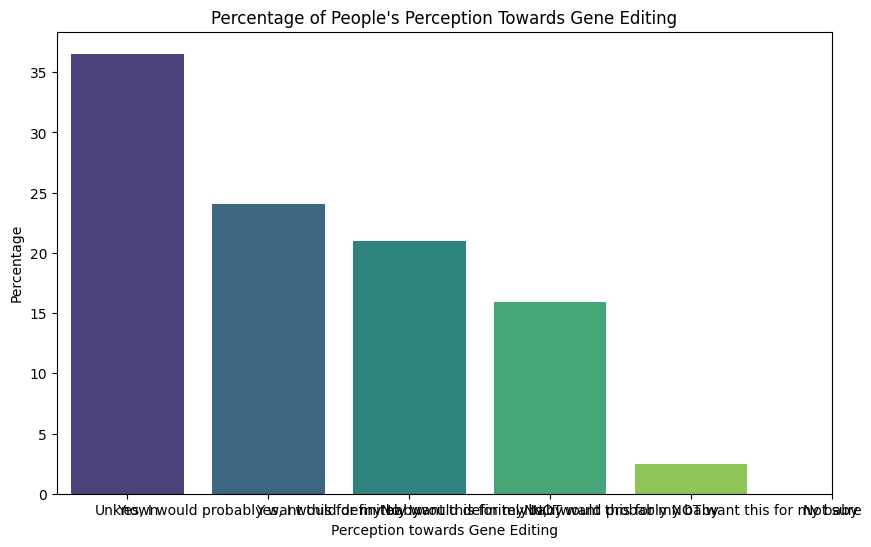

In [135]:
# check overall opinion towards wether to try gene editin on people's own baby
percentage_data = df1_cleaned['overall_trygene'].value_counts(normalize=True) * 100
percentage_data = percentage_data.reset_index()
percentage_data.columns = ['Perception', 'Percentage']
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Perception', y='Percentage', data=percentage_data, palette='viridis')
plt.title("Percentage of People's Perception Towards Gene Editing")
plt.xlabel("Perception towards Gene Editing")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Unknown', 'Yes, I would probably want this for my baby', 'Yes, I would definitely want this for my baby', 'No, I would definitely NOT want this for my baby', 'No, I would probably NOT want this for my baby', 'Not sure'])
plt.show()

In [136]:
# Function to plot bar plots for each demographic factor with percentage
def plot_percentage(df1_cleaned, x_col, hue_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    # Calculate percentage
    percentage_data = df1_cleaned.groupby([hue_col, x_col]).size().reset_index(name='count')
    total = percentage_data.groupby(hue_col)['count'].transform('sum')
    percentage_data['percentage'] = percentage_data['count'] / total * 100
    sns.barplot(x=x_col, y='percentage', hue=hue_col, data=percentage_data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title=hue_col)
    plt.show()

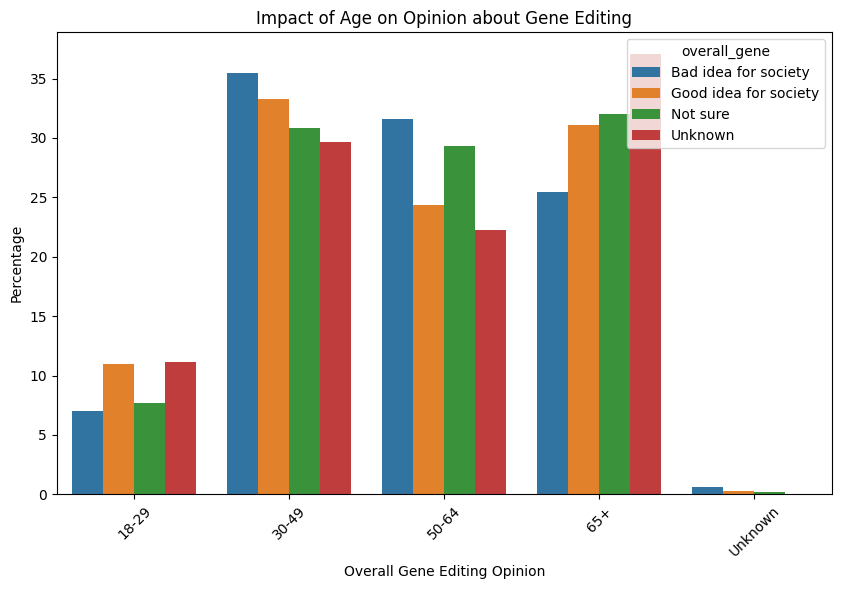

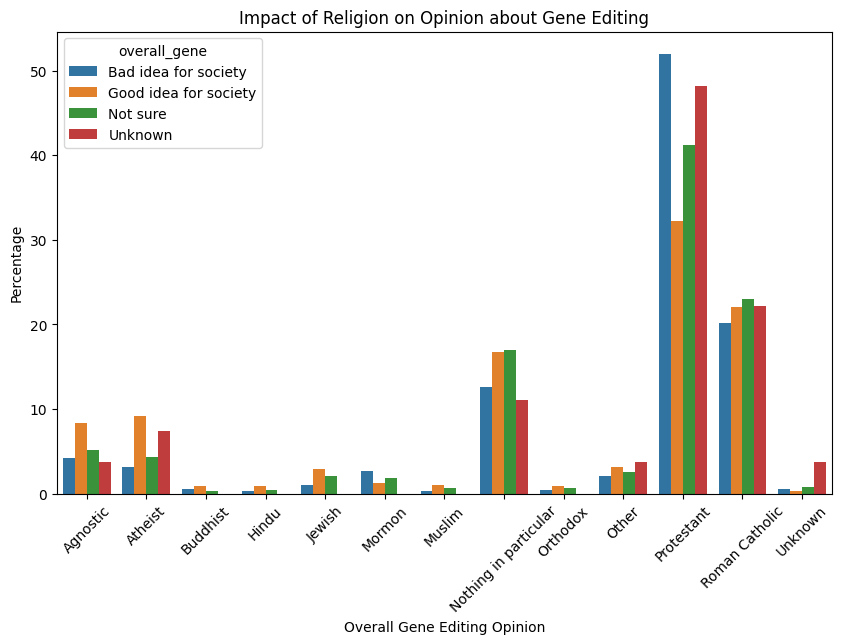

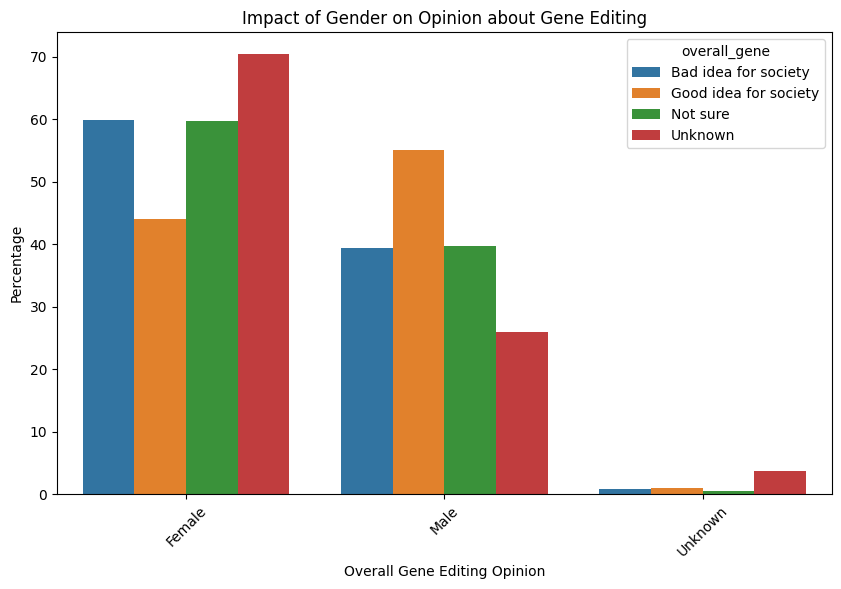

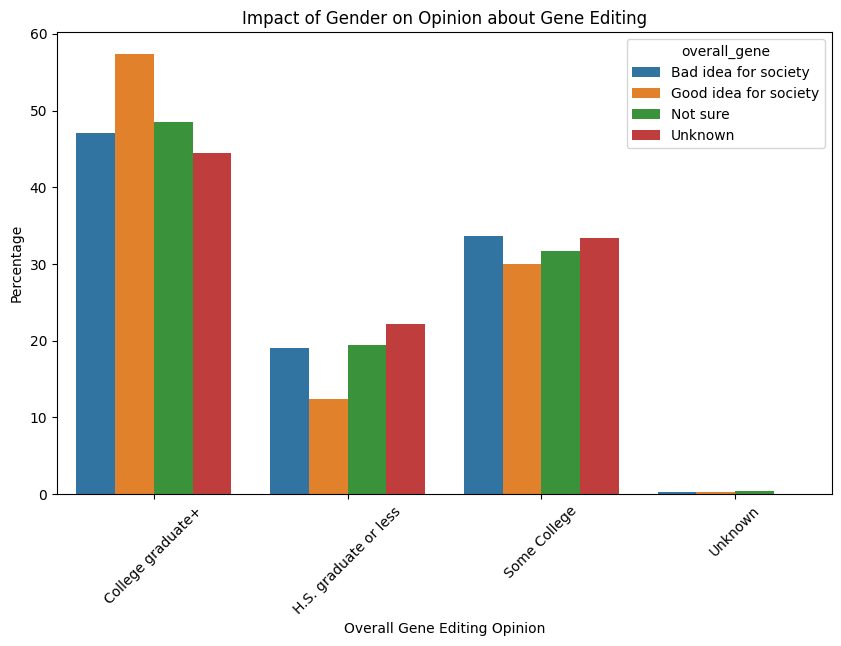

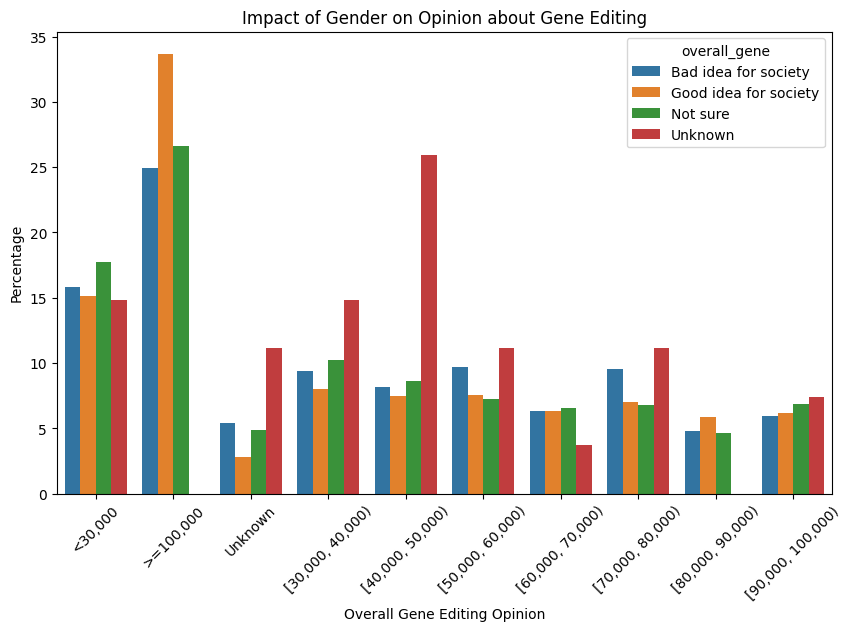

In [137]:
# visualization
# Visualize impact on overall_gene
plot_percentage(df1_cleaned, 'age','overall_gene','Impact of Age on Opinion about Gene Editing', 'Overall Gene Editing Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'religion','overall_gene', 'Impact of Religion on Opinion about Gene Editing', 'Overall Gene Editing Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'gender','overall_gene','Impact of Gender on Opinion about Gene Editing', 'Overall Gene Editing Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'education','overall_gene','Impact of Gender on Opinion about Gene Editing', 'Overall Gene Editing Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'income','overall_gene','Impact of Gender on Opinion about Gene Editing', 'Overall Gene Editing Opinion', 'Percentage')

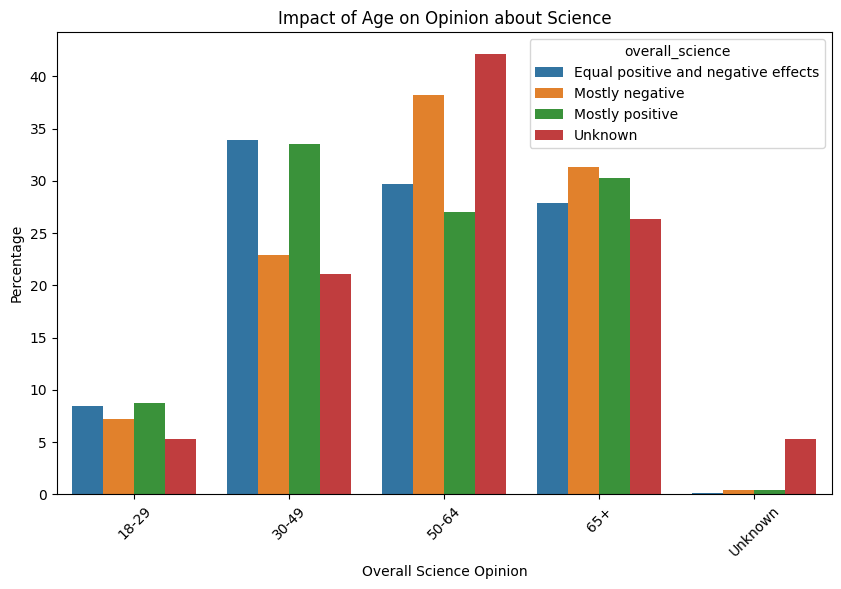

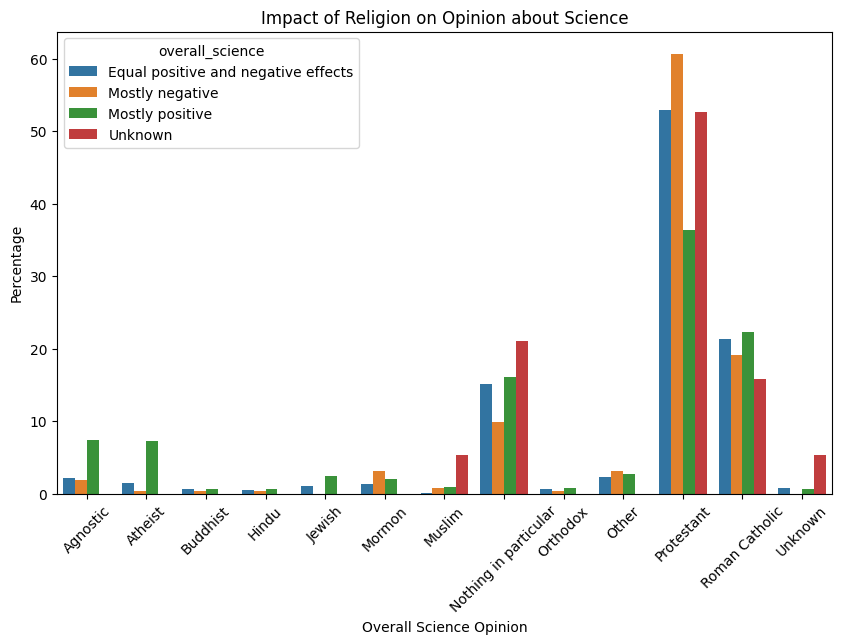

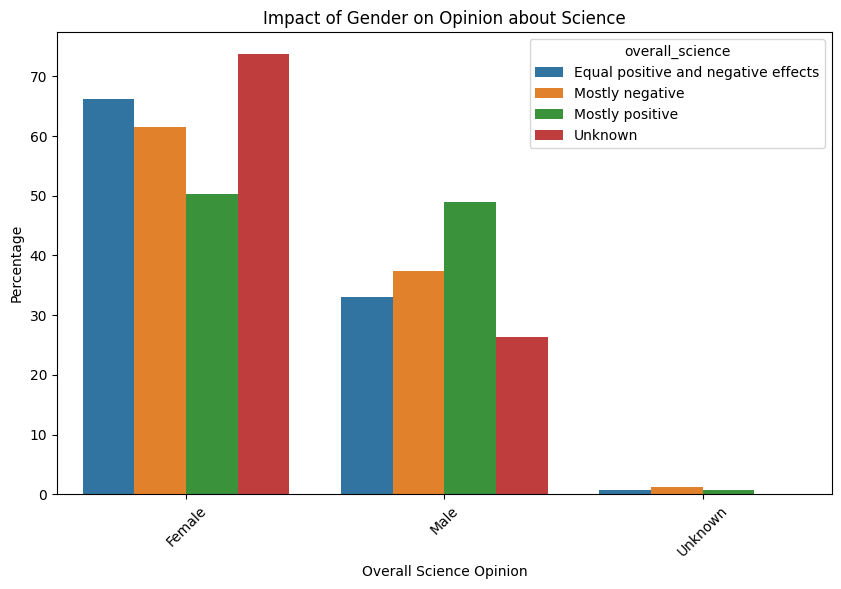

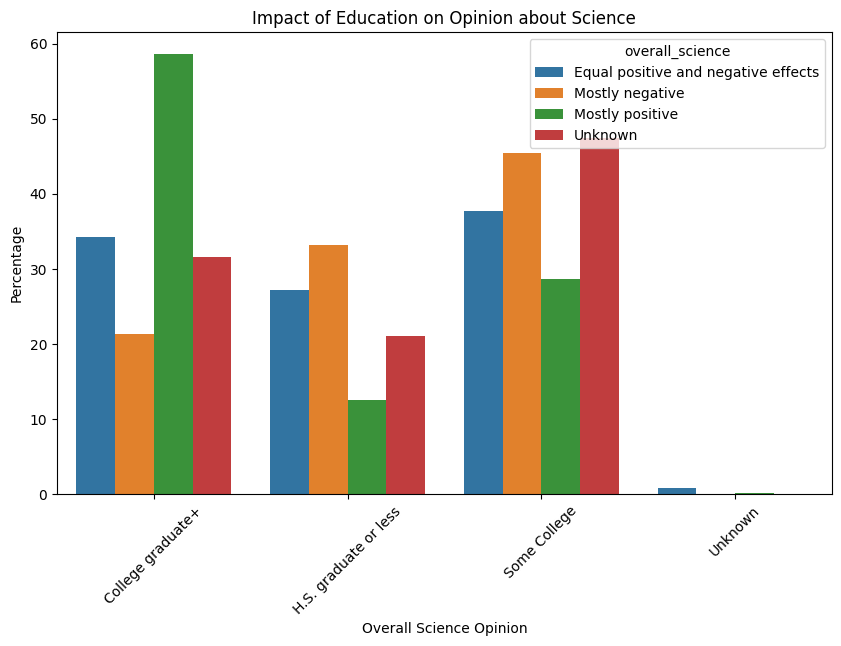

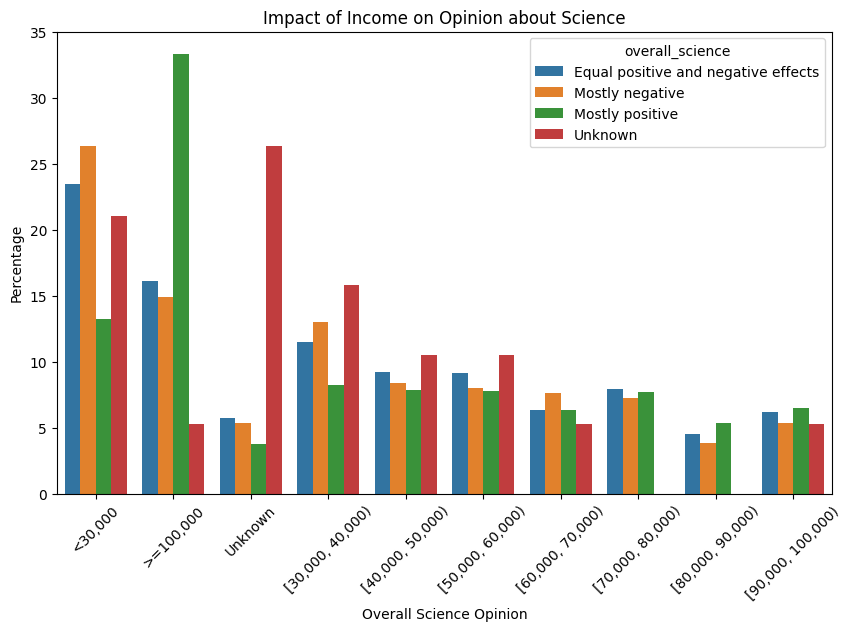

In [138]:
# Visualize impact on overall_science
plot_percentage(df1_cleaned, 'age', 'overall_science', 'Impact of Age on Opinion about Science', 'Overall Science Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'religion','overall_science',  'Impact of Religion on Opinion about Science', 'Overall Science Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'gender', 'overall_science', 'Impact of Gender on Opinion about Science', 'Overall Science Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'education','overall_science',  'Impact of Education on Opinion about Science', 'Overall Science Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'income','overall_science',  'Impact of Income on Opinion about Science', 'Overall Science Opinion', 'Percentage')

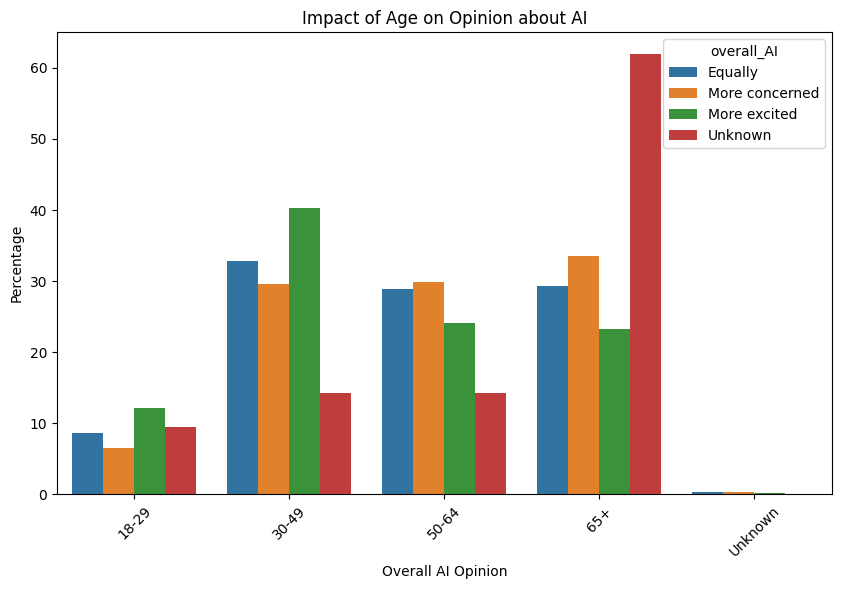

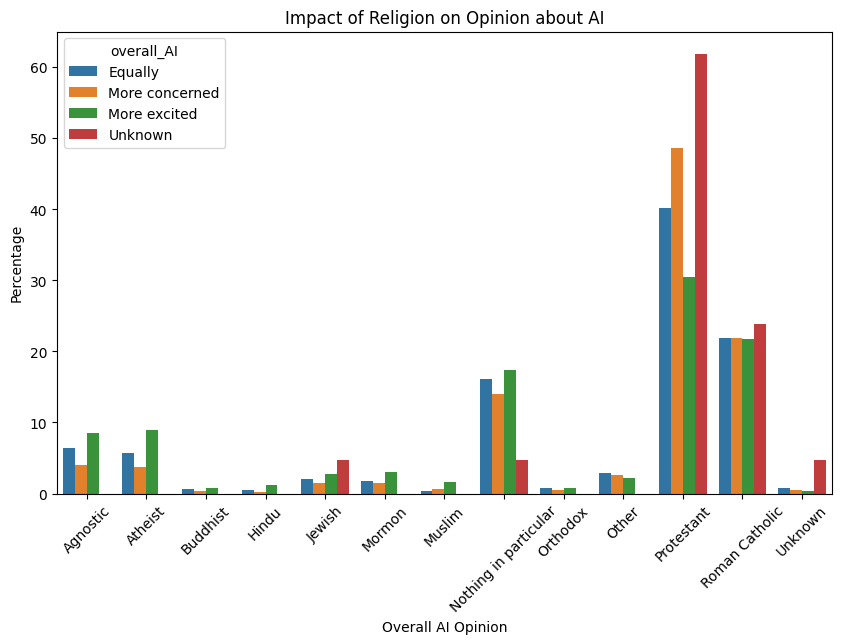

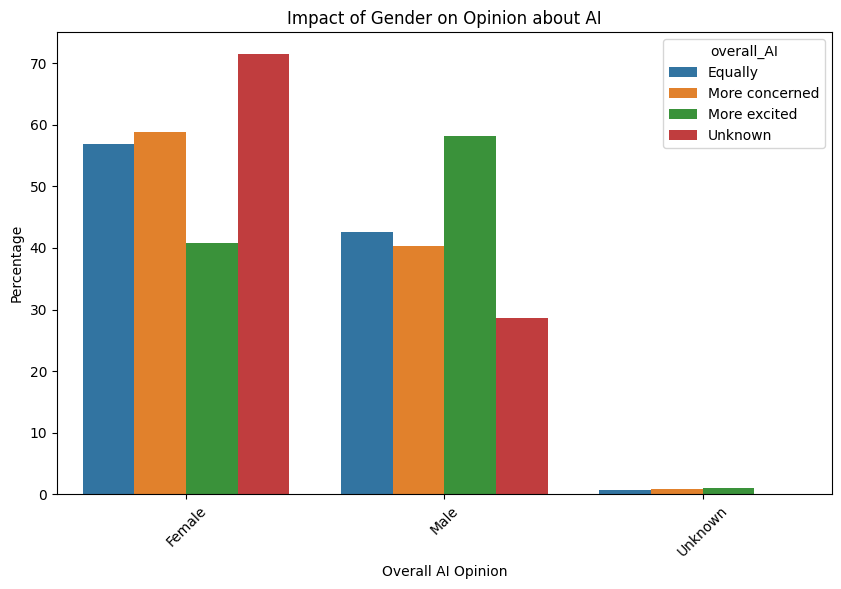

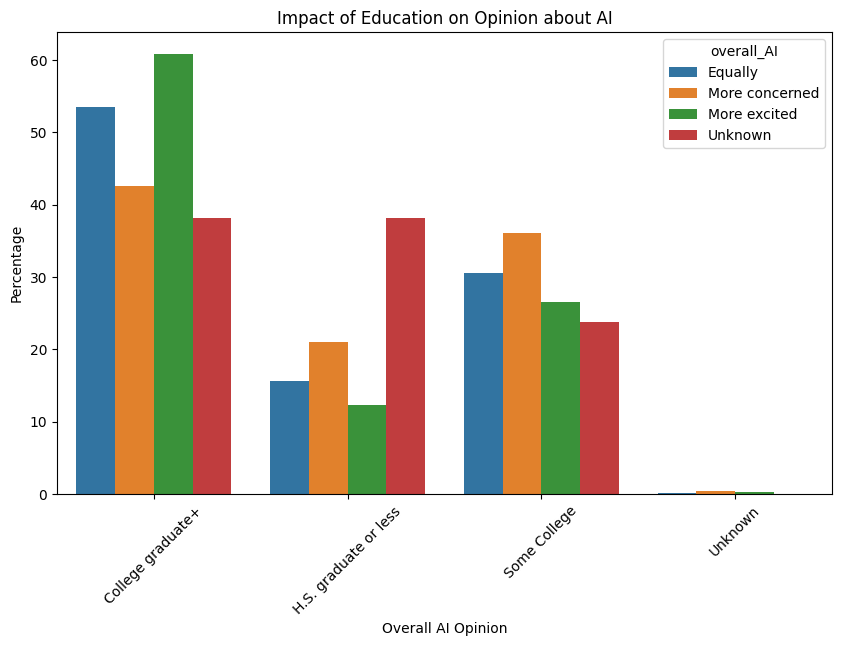

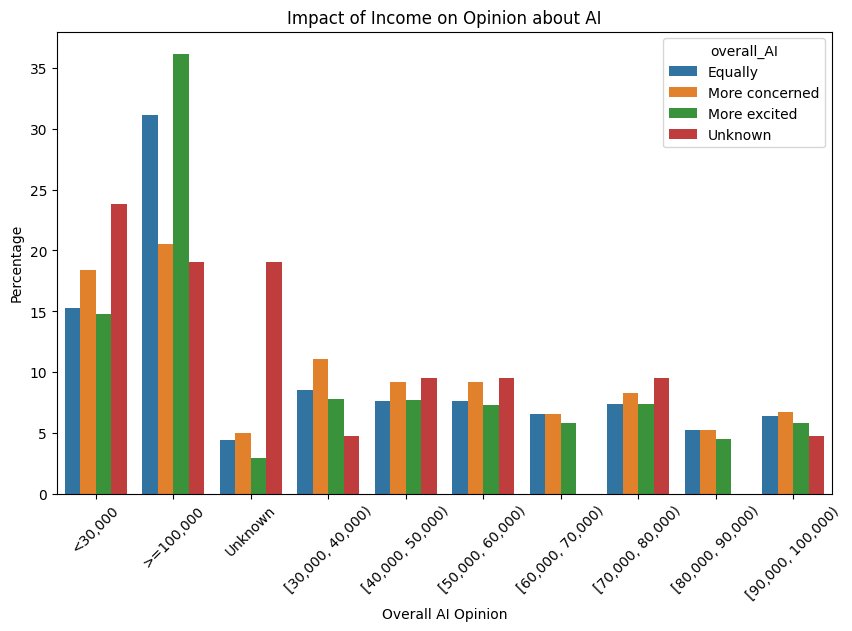

In [139]:
# Visualize impact on overall_AI
plot_percentage(df1_cleaned, 'age','overall_AI',  'Impact of Age on Opinion about AI', 'Overall AI Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'religion','overall_AI',  'Impact of Religion on Opinion about AI', 'Overall AI Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'gender','overall_AI',  'Impact of Gender on Opinion about AI', 'Overall AI Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'education','overall_AI',  'Impact of Education on Opinion about AI', 'Overall AI Opinion', 'Percentage')
plot_percentage(df1_cleaned, 'income','overall_AI',  'Impact of Income on Opinion about AI', 'Overall AI Opinion', 'Percentage')

In [140]:
# Remove NaN values from the analysis for all relevant columns
df2 = df1.dropna(subset=[ 'age', 'religion', 'gender', 'education', 'income', 
    'overall_gene'])

In [141]:
# check unique values with each variable and convert categorical to numeric variables
df2['gender'].describe()

count       5107
unique         3
top       Female
freq        2788
Name: gender, dtype: object

In [142]:
# transfer gender categorical to numerical variables
df2['gender']=df2['gender'].map({'Female':1,'Male':0,'Unknown':2}).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3088416842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender']=df2['gender'].map({'Female':1,'Male':0,'Unknown':2}).astype(int)


In [143]:
print(df2['gender'].unique())

[0 1 2]


In [144]:
df2['income']=df2['income'].map({'Unknown':0,'<30,000':1,'[30,000, 40,000)':2, '[40,000, 50,000)':3, '[50,000, 60,000)':4, '[60,000, 70,000)':5, '[70,000, 80,000)':6, '[80,000, 90,000)':7, '[90,000, 100,000)':8, '>=100,000':9 }).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2996673670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income']=df2['income'].map({'Unknown':0,'<30,000':1,'[30,000, 40,000)':2, '[40,000, 50,000)':3, '[50,000, 60,000)':4, '[60,000, 70,000)':5, '[70,000, 80,000)':6, '[80,000, 90,000)':7, '[90,000, 100,000)':8, '>=100,000':9 }).astype(int)


In [145]:
df2['education']=df2['education'].map({'College graduate+':1,'Some College':2,'Unknown':0, 'H.S. graduate or less':3}).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3467018772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['education']=df2['education'].map({'College graduate+':1,'Some College':2,'Unknown':0, 'H.S. graduate or less':3}).astype(int)


In [146]:
print(df2['religion'].unique())

['Nothing in particular' 'Protestant' 'Agnostic' 'Other' 'Roman Catholic'
 'Buddhist' 'Mormon' 'Atheist' 'Jewish' 'Unknown' 'Muslim' 'Hindu'
 'Orthodox']


In [147]:
religion_mapping = {
    'Mormon': 'Mormon',
    'Protestant': 'Protestant',
    'Nothing in particular': 'Unknown', 
    'Other': 'Unknown',  
    'Unknown': 'Unknown',
    # List all other specific religions to map to 'Positive religions'
    'Roman Catholic': 'Positive religions',
    'Agnostic': 'Positive religions',
    'Atheist': 'Positive religions',
    'Buddhist': 'Positive religions',
    'Jewish': 'Positive religions',
    'Orthodox': 'Positive religions',
    'Hindu': 'Positive religions',
    'Muslim': 'Positive religions'
}

In [148]:
df2['religion'] = df2['religion'].replace(religion_mapping)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3230657223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['religion'] = df2['religion'].replace(religion_mapping)


In [149]:
print(df2['religion'].unique())

['Unknown' 'Protestant' 'Positive religions' 'Mormon']


In [150]:
df2['religion']=df2['religion'].map({'Unknown':0, 'Mormon':2, 'Protestant':3, 'Positive religions':1}).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\2223551941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['religion']=df2['religion'].map({'Unknown':0, 'Mormon':2, 'Protestant':3, 'Positive religions':1}).astype(int)


In [151]:
df2['age']=df2['age'].map({'Unknown':0, '65+':1, '30-49':3, '50-64':2, '18-29':4}).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\3091995136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age']=df2['age'].map({'Unknown':0, '65+':1, '30-49':3, '50-64':2, '18-29':4}).astype(int)


In [152]:
print(df2['overall_gene'].unique())

['Not sure' 'Bad idea for society' 'Good idea for society' 'Unknown']


In [153]:
religion_mapping = {
    'Not sure': 'Unknown', 
    'None': 'Unknown',  
    'Unknown': 'Unknown',
    'Bad idea for society': 'Bad idea for society',
    'Good idea for society': 'Good idea for society'}

In [154]:
df2['overall_gene'] = df2['overall_gene'].replace(religion_mapping)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\587005752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['overall_gene'] = df2['overall_gene'].replace(religion_mapping)


In [155]:
df2['overall_gene']=df2['overall_gene'].map({'Unknown':0, 'Good idea for society':1, 'Bad idea for society':2}).astype(int)

C:\Users\nazil\AppData\Local\Temp\ipykernel_19272\980707723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['overall_gene']=df2['overall_gene'].map({'Unknown':0, 'Good idea for society':1, 'Bad idea for society':2}).astype(int)


In [156]:
df_numeric = df2.copy()

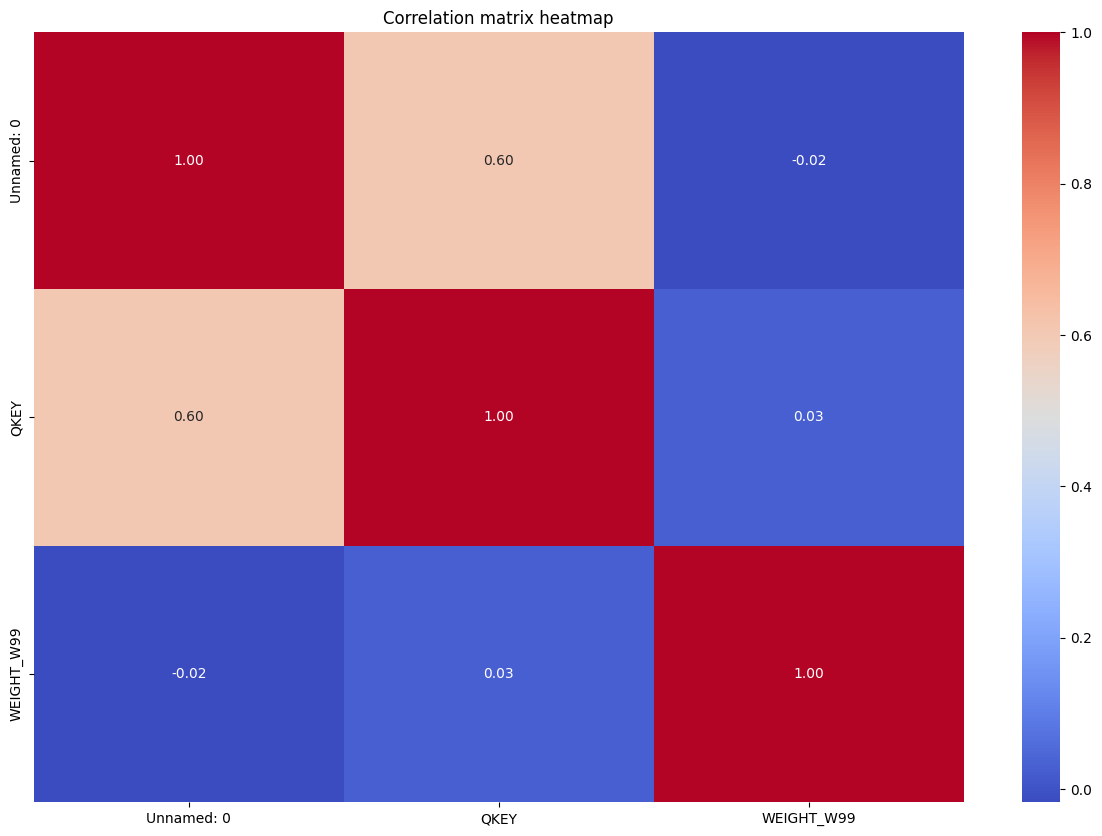

In [157]:
# Calculate Pearson correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

In [158]:
# Manually select columns based on their relevance for clustering
# Replace these with appropriate column names based on the dataset
selected_columns = ['F_AGECAT', 'F_EDUCCAT2', 'F_MARITAL', 'F_RELIG', 'F_INC_SDT1', 'GENEV3_W99']

# Check the selected columns
print("Selected Columns for Clustering:", selected_columns)

Selected Columns for Clustering: ['F_AGECAT', 'F_EDUCCAT2', 'F_MARITAL', 'F_RELIG', 'F_INC_SDT1', 'GENEV3_W99']


In [159]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}

# Encode categorical columns
for column in selected_columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

# Display the first few rows of the processed dataset
print(df[selected_columns].head())

   F_AGECAT  F_EDUCCAT2  F_MARITAL  F_RELIG  F_INC_SDT1  GENEV3_W99
0         3           1          3        7           3           4
1         3           6          0       10           2           4
2         1           4          2       12           0           4
3         2           4          2       10           0           4
4         3           0          2       10           1           4


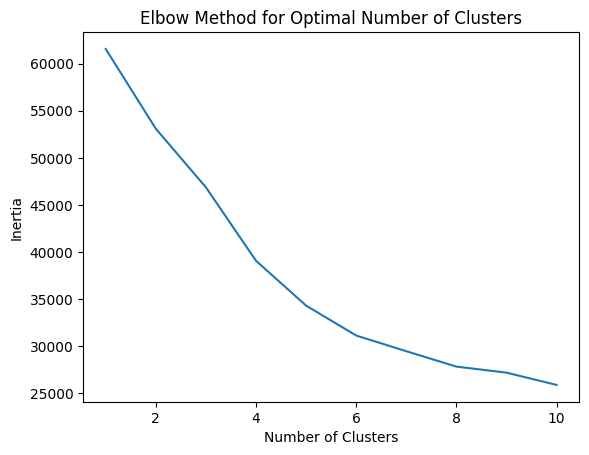

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[selected_columns])

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [161]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with the chosen number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with the assigned cluster labels
print(df.head())


   Unnamed: 0    QKEY INTERVIEW_START_W99   INTERVIEW_END_W99 DEVICE_TYPE_W99  \
0           0  100260 2021-11-03 14:25:27 2021-11-03 14:45:34       Laptop/PC   
1           1  100314 2021-11-04 12:35:35 2021-11-04 12:55:29      Smartphone   
2           2  100363 2021-11-03 20:23:43 2021-11-03 20:36:24      Smartphone   
3           3  100598 2021-11-02 13:01:05 2021-11-04 12:37:42       Laptop/PC   
4           4  100637 2021-11-02 12:32:58 2021-11-02 12:46:23       Laptop/PC   

  LANG_W99 FORM_W99    XTABLET_W99        TECH1_W99  \
0  English   Form 2  Non-tablet HH              NaN   
1  English   Form 1  Non-tablet HH  Mostly positive   
2  English   Form 1  Non-tablet HH  Mostly positive   
3  English   Form 2  Non-tablet HH              NaN   
4  English   Form 2  Non-tablet HH              NaN   

                               SC1_W99  ... F_PARTYSUM_FINAL  \
0                      Mostly positive  ...     Rep/Lean Rep   
1                                  NaN  ...     Rep/Le

<Figure size 1200x600 with 0 Axes>

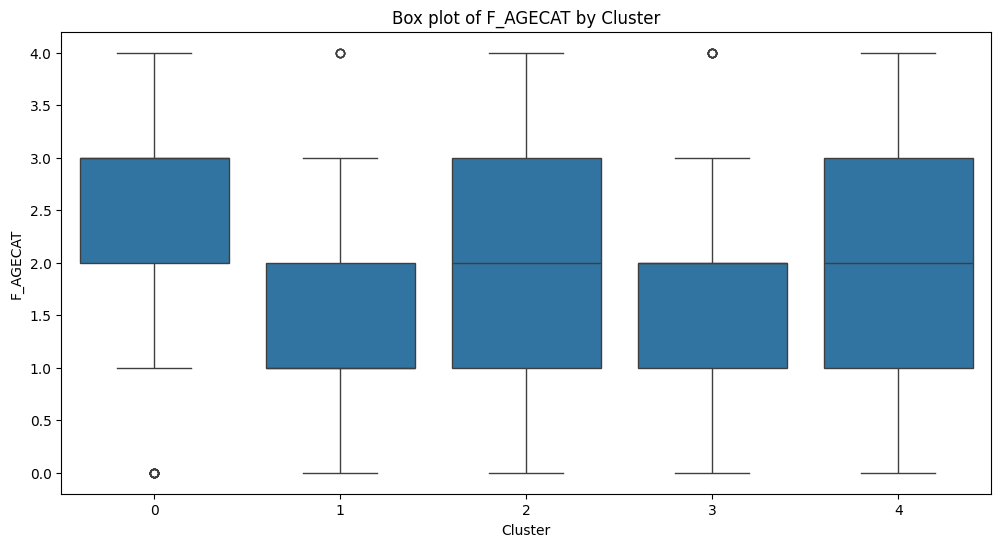

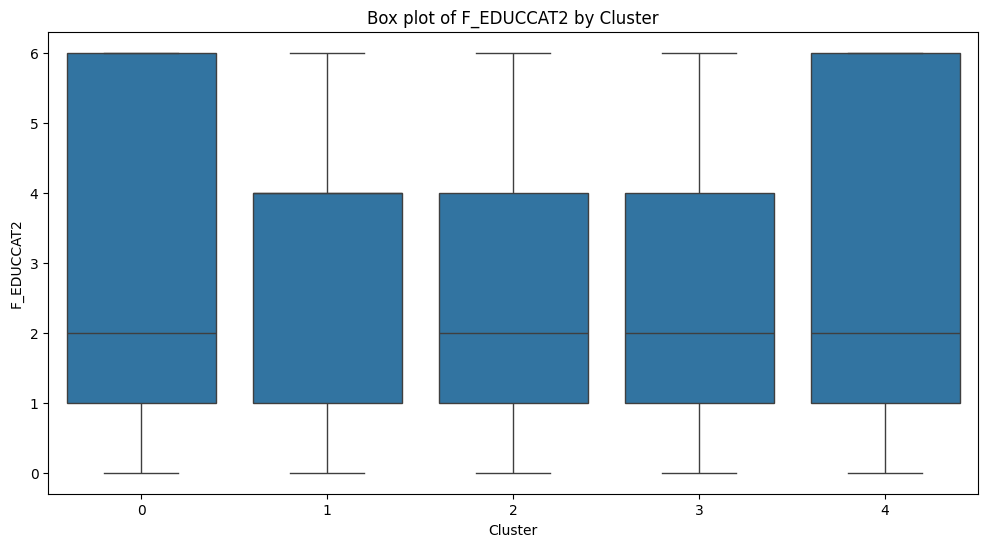

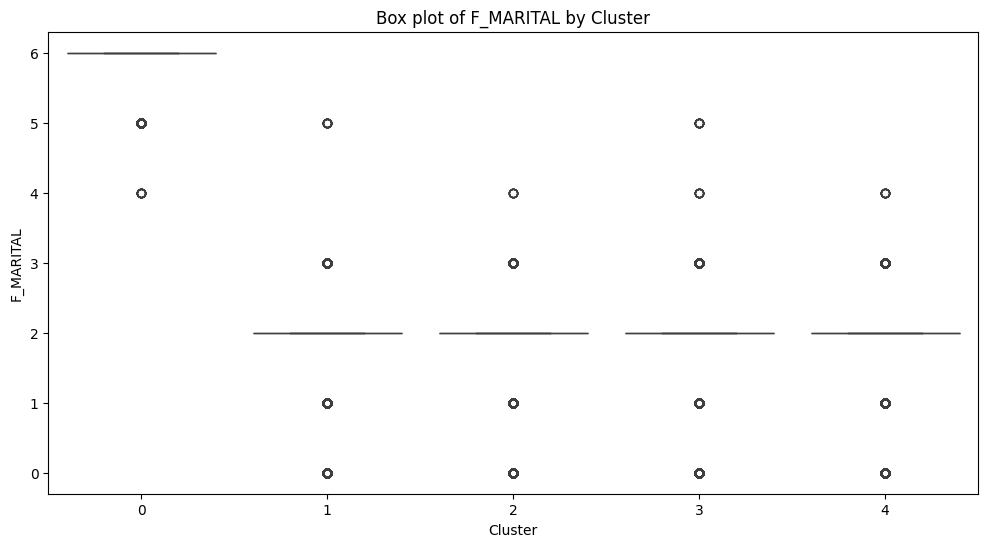

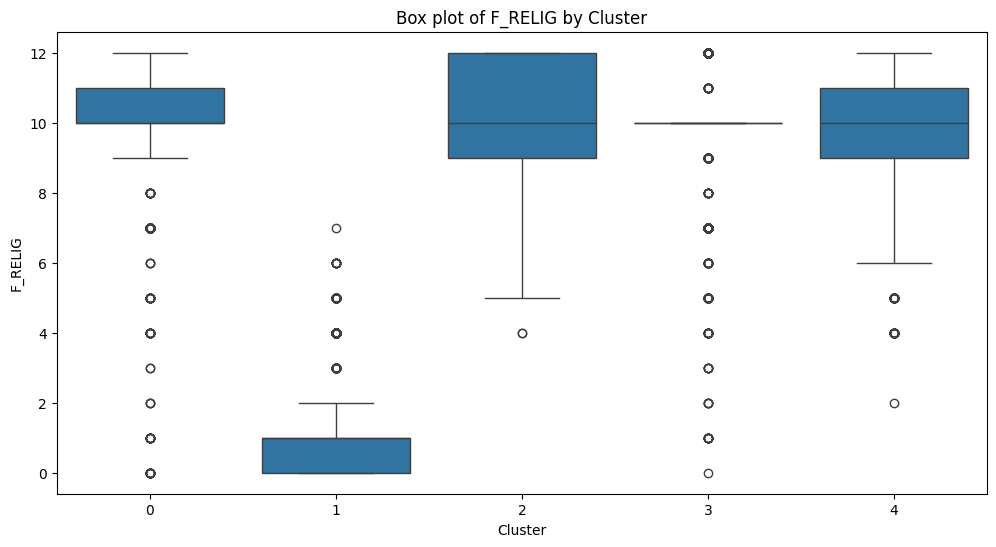

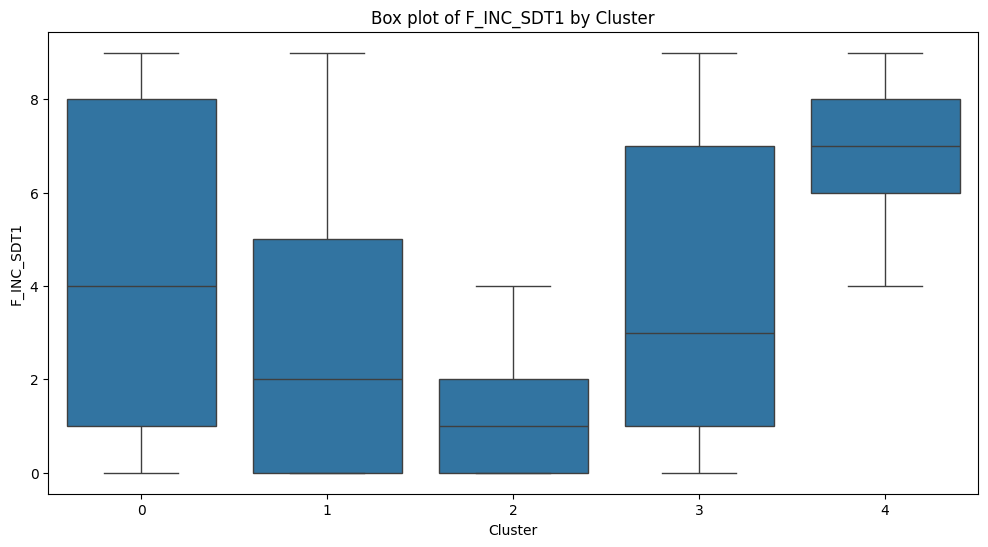

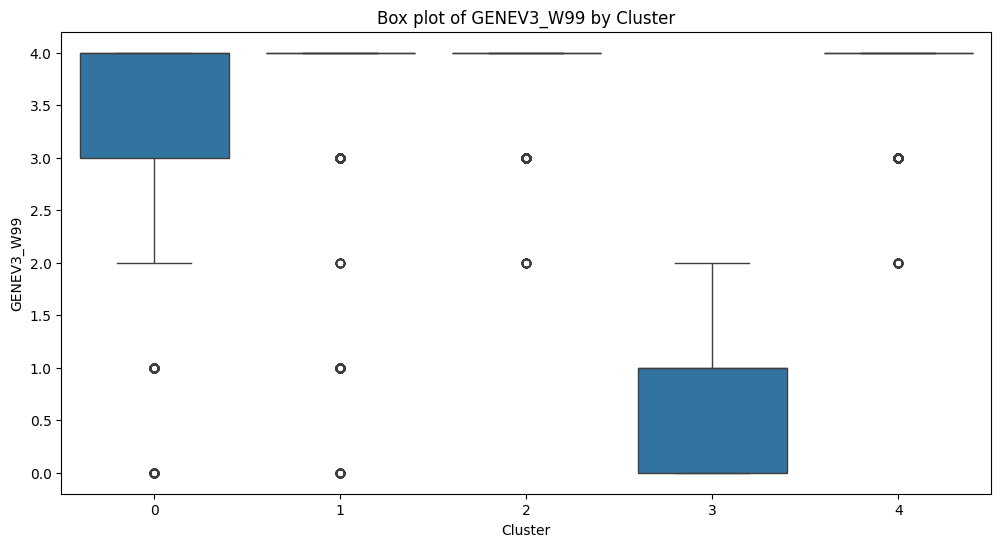

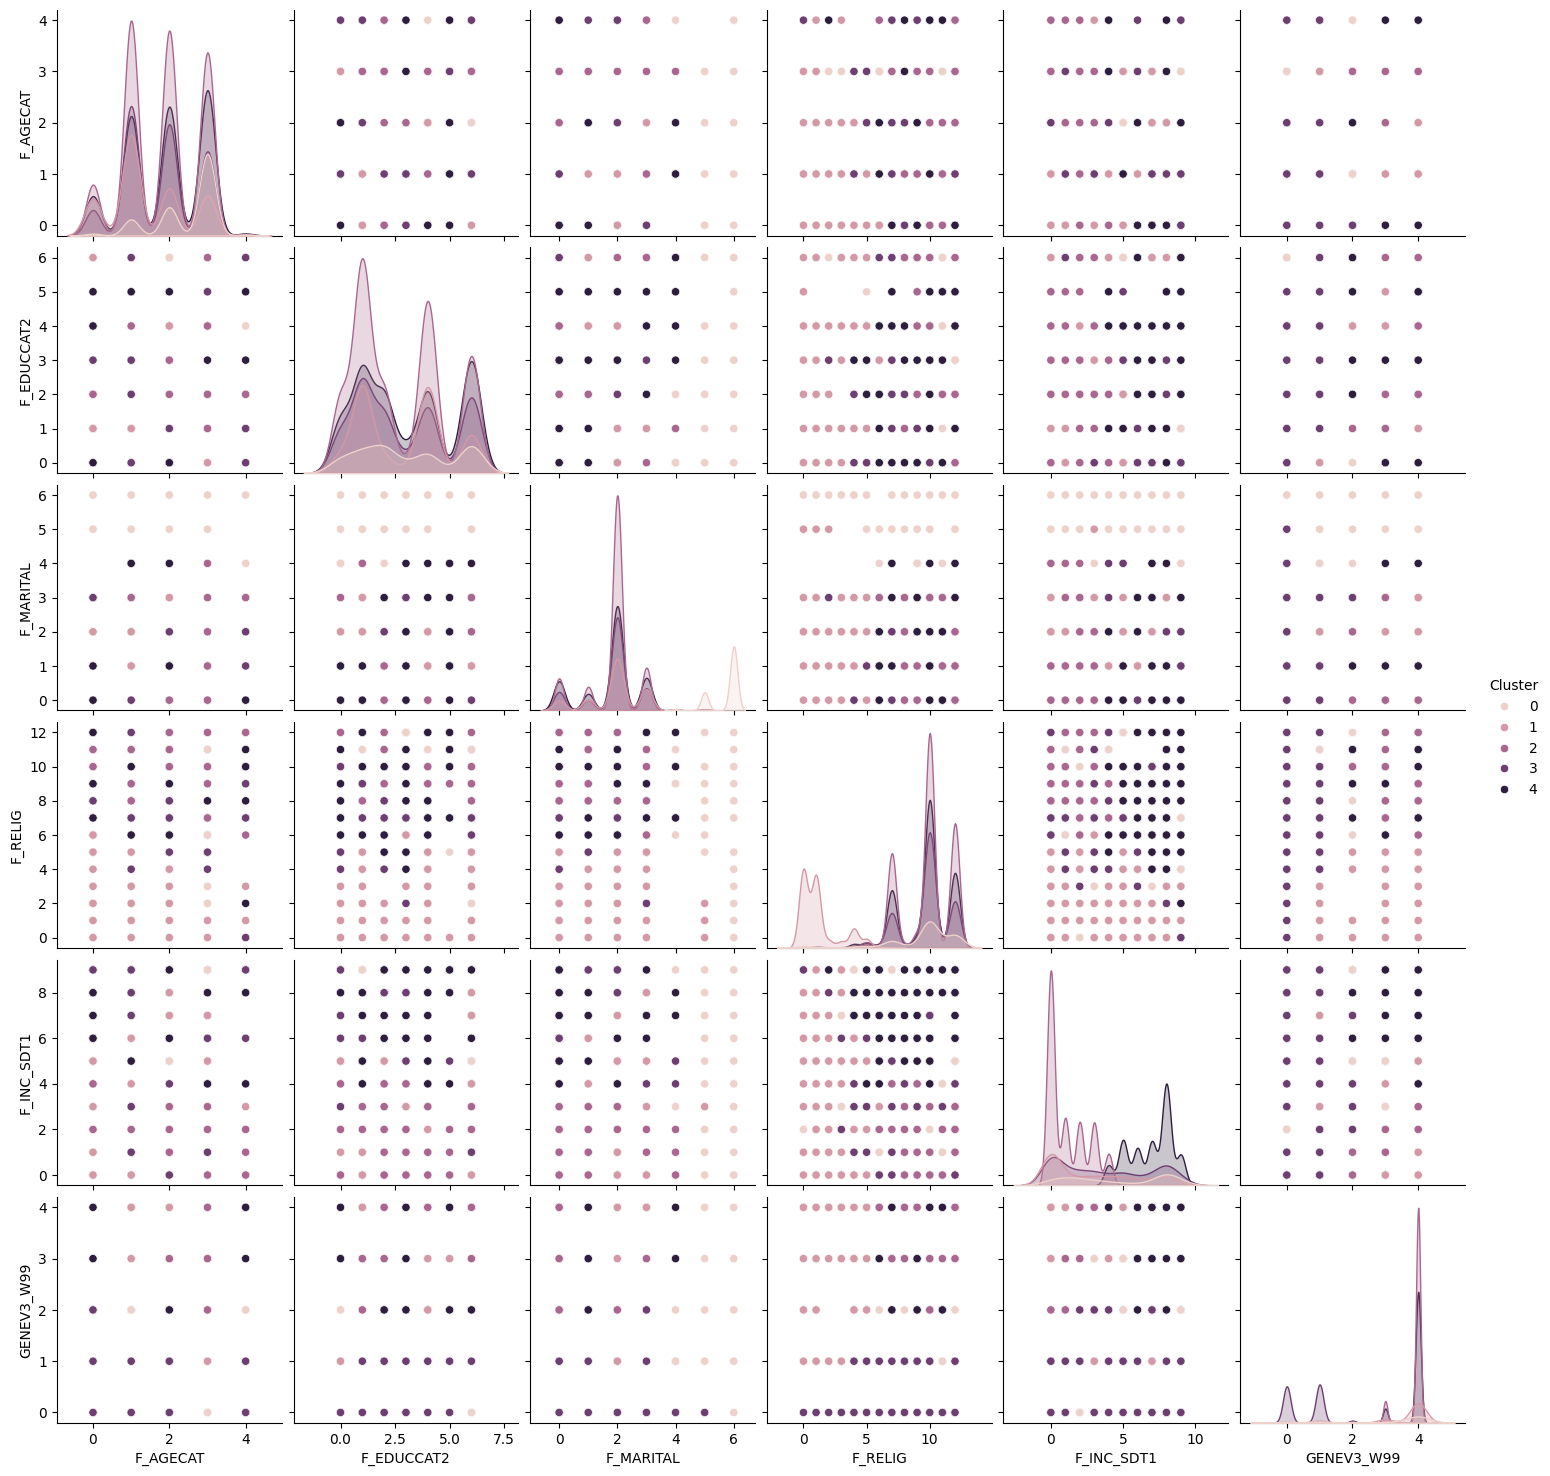

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 6))

# Box plots for each variable across clusters
for column in selected_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Box plot of {column} by Cluster')
    plt.show()

# Pair plot to visualize relationships between variables across clusters
sns.pairplot(df, hue='Cluster', vars=selected_columns)
plt.show()

In [163]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=selected_columns)
print(centroids_df)

   F_AGECAT  F_EDUCCAT2  F_MARITAL   F_RELIG  F_INC_SDT1  GENEV3_W99
0  0.709381    0.089341   2.722118  0.263937    0.315019    0.023835
1 -0.406003    0.000574  -0.146536 -2.064509   -0.265065    0.257546
2 -0.004222   -0.071195  -0.209167  0.373421   -0.764584    0.535148
3 -0.074276   -0.000422  -0.216329  0.316815    0.053967   -1.778609
4  0.084710    0.069562  -0.272219  0.344348    1.046795    0.521892


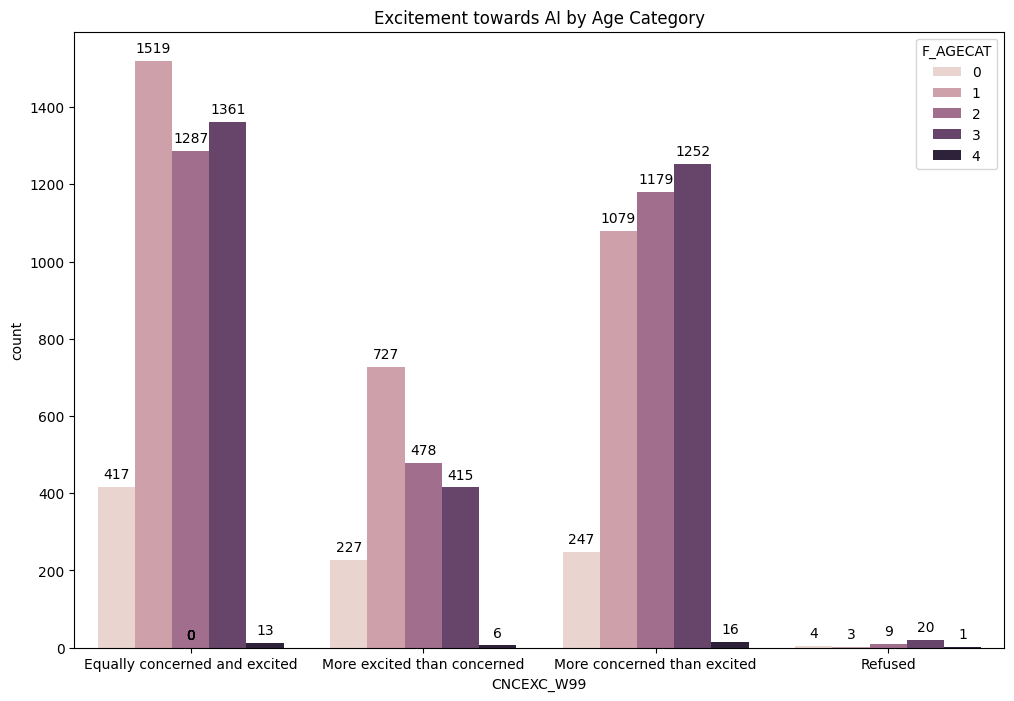

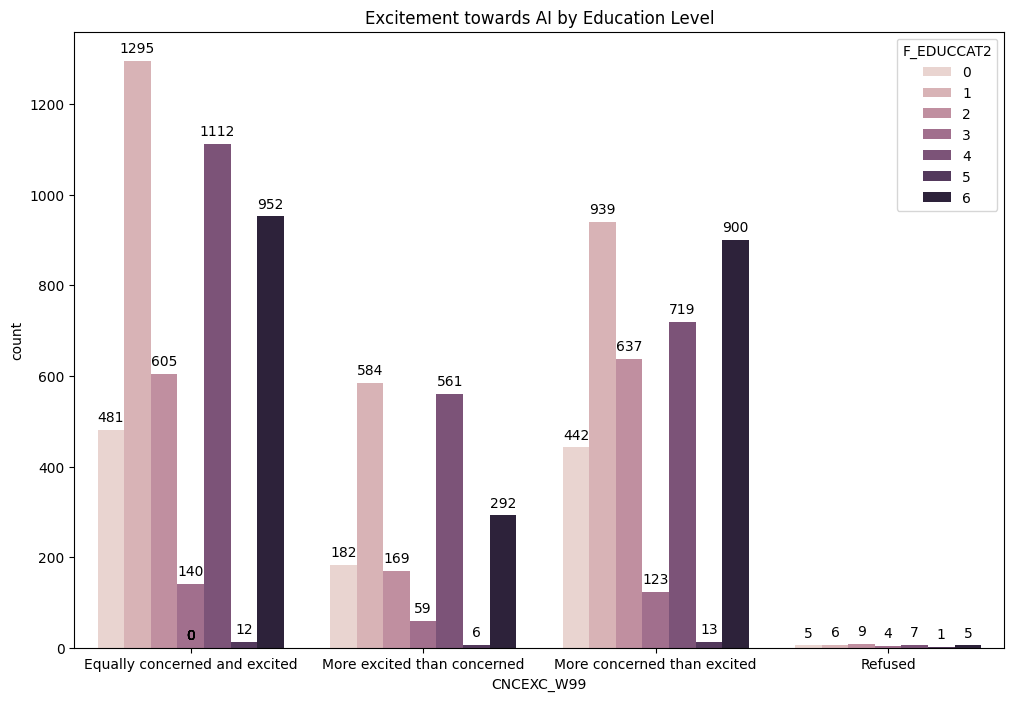

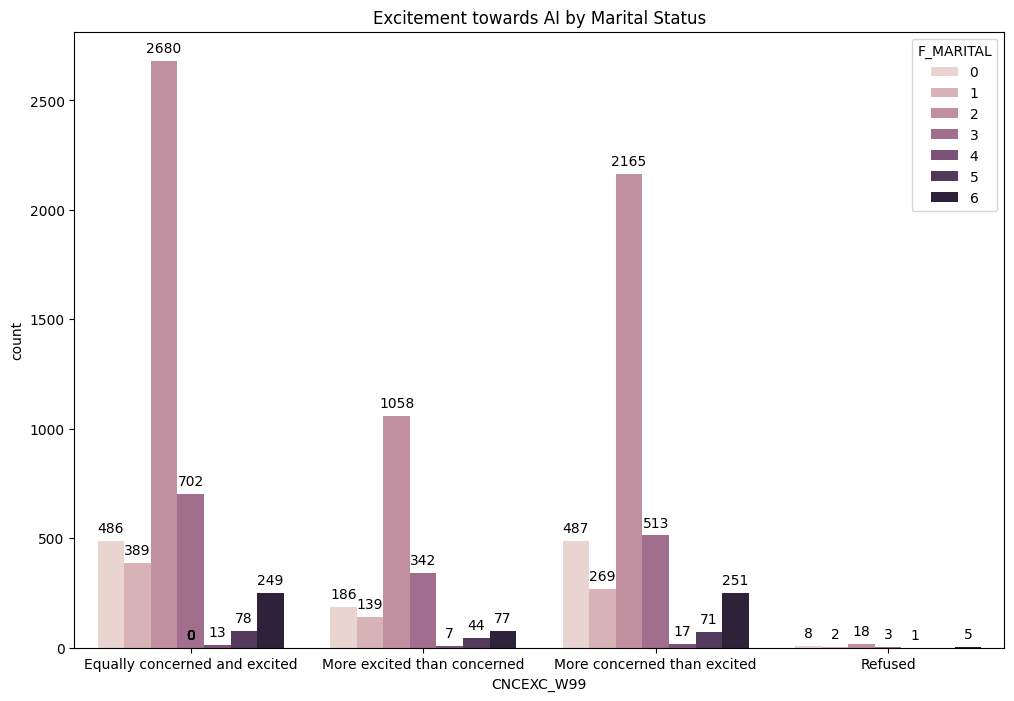

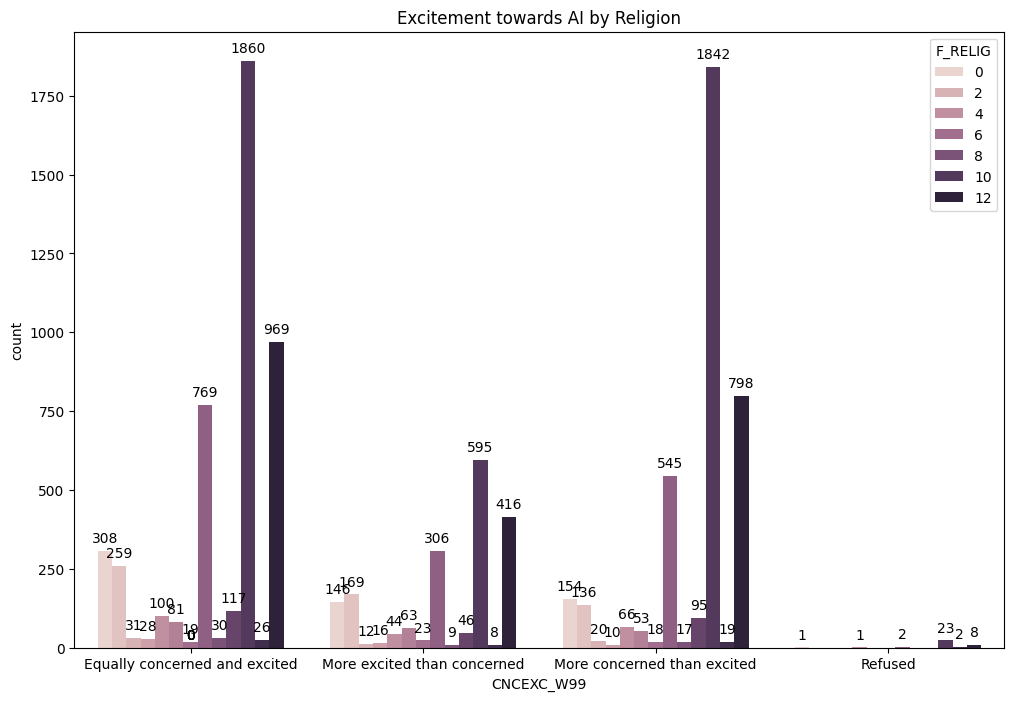

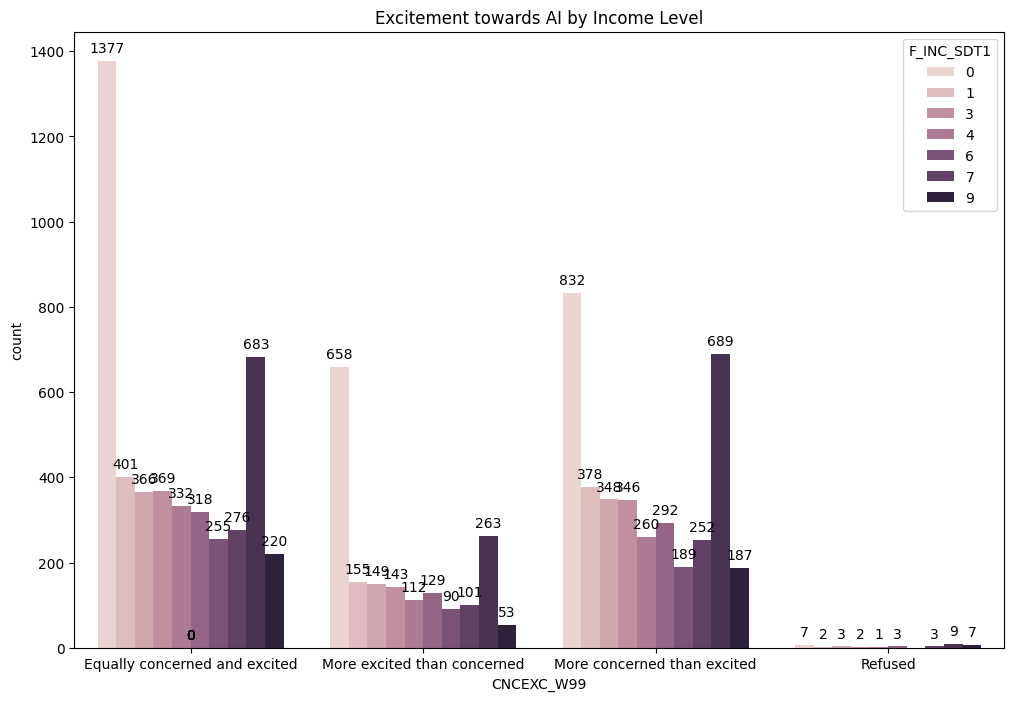

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting excitement towards AI based on different demographics
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='CNCEXC_W99', hue='F_AGECAT')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Excitement towards AI by Age Category')
plt.show()

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='CNCEXC_W99', hue='F_EDUCCAT2')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Excitement towards AI by Education Level')
plt.show()

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='CNCEXC_W99', hue='F_MARITAL')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Excitement towards AI by Marital Status')
plt.show()

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='CNCEXC_W99', hue='F_RELIG')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Excitement towards AI by Religion')
plt.show()

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='CNCEXC_W99', hue='F_INC_SDT1')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Excitement towards AI by Income Level')
plt.show()

In [165]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import re

In [167]:
# Define the columns to be considered for NLP (based on identified questions)
nlp_positive = ['EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE3']

# Combine the text columns into a single column for NLP processing
df['combined_text'] = df[nlp_positive].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [168]:
# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

df['processed_text'] = df['combined_text'].apply(preprocess_text)

In [169]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
# Initialize TF-IDF Vectorizer
stop_words = list(stopwords.words('english'))  # Convert set to list
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

In [171]:
# Initialize LDA for topic modeling
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [172]:
# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 10)

Topic 0:
future inevitable progress worklabor helps peoples fears scifi reality based
Topic 1:
dont knowno answer helps tasks society better life makes worklabor
Topic 2:
society better makes life helps efficient time saves worklabor anecdotes
Topic 3:
efficient saves time mundane tedious handles tasks helps worklabor accurate
Topic 4:
humans helps accurate interesting ai exciting difficultdangerous disability elderlyhave tasks


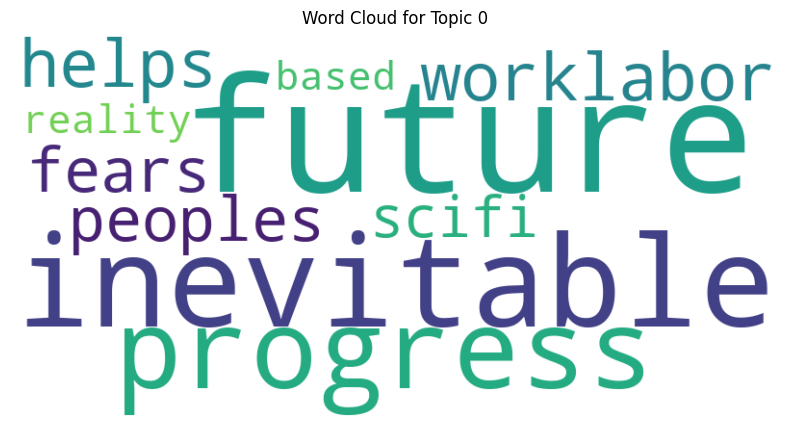

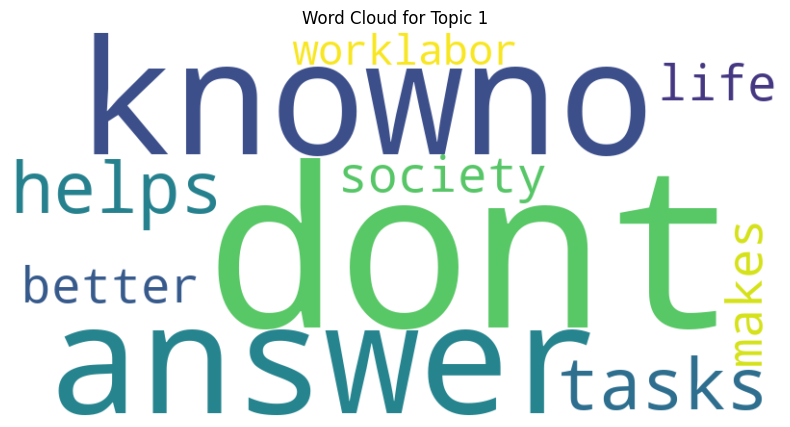

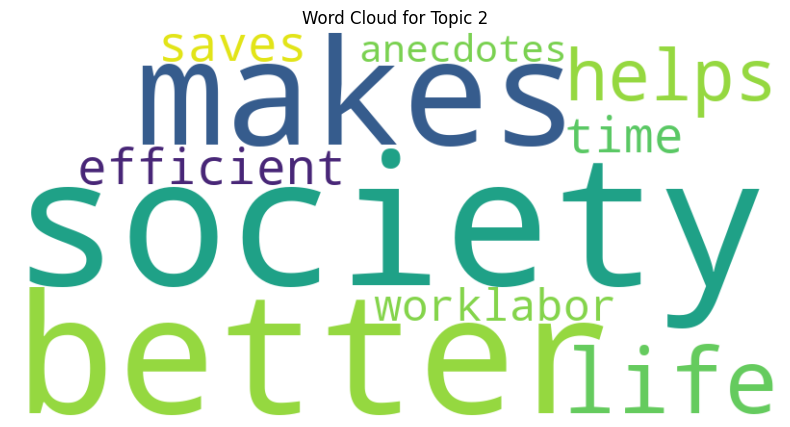

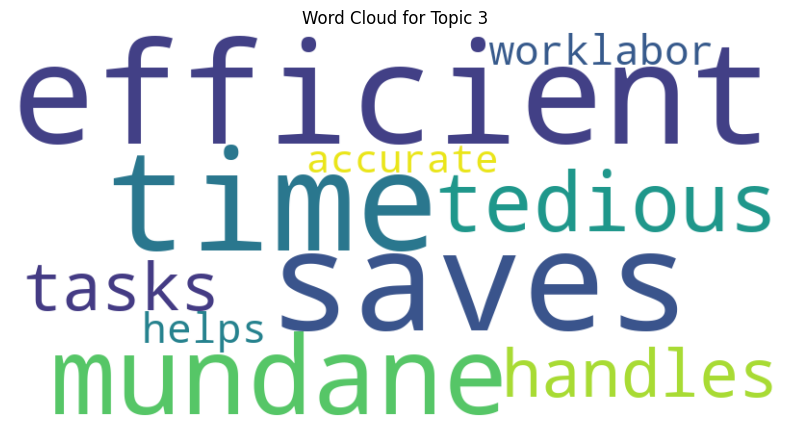

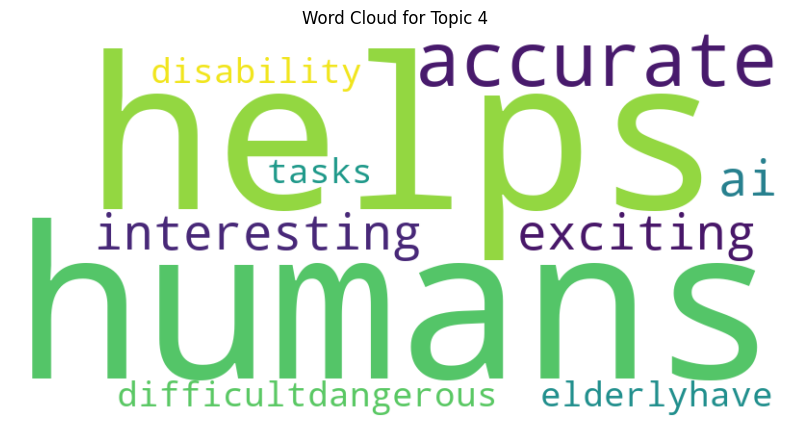

In [173]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topics = {
    0: "future inevitable progress worklabor helps peoples fears scifi reality based",
    1: "dont knowno answer helps tasks society better life makes worklabor",
    2: "society better makes life helps efficient time saves worklabor anecdotes",
    3: "efficient saves time mundane tedious handles tasks helps worklabor accurate",
    4: "humans helps accurate interesting ai exciting difficultdangerous disability elderlyhave tasks"
}

# Function to generate word cloud for a given topic
def generate_wordcloud(topic_words, topic_number):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_number}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic
for topic_number, words in topics.items():
    generate_wordcloud(words, topic_number)


In [174]:
# Define the columns to be considered for NLP (based on identified questions)
nlp_negative = ['CONCERNOE_W99_OE1', 'CONCERNOE_W99_OE2', 'CONCERNOE_W99_OE3']

# Combine the text columns into a single column for NLP processing
df['combined_text'] = df[nlp_negative].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

df['processed_text'] = df['combined_text'].apply(preprocess_text)

In [175]:
import nltk
nltk.download('stopwords')
# Initialize TF-IDF Vectorizer
stop_words = list(stopwords.words('english'))  # Convert set to list
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])
# Initialize LDA for topic modeling
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LatentDirichletAllocation(n_components=5, random_state=42)

In [176]:
# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 10)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Topic 0:
ai misusing people fails makes mistakes coded bias wielding trust
Topic 1:
answer knowno dont becoming aitech reliant people unforeseen consequenceseffects regulation
Topic 2:
human loss jobs connection qualities lack freedom people ai unforeseen
Topic 3:
digital hacking surveillance privacy companies concerns govttech using ai freedom
Topic 4:
get outsmarting powerful people ai lack freedom oversight regulation human


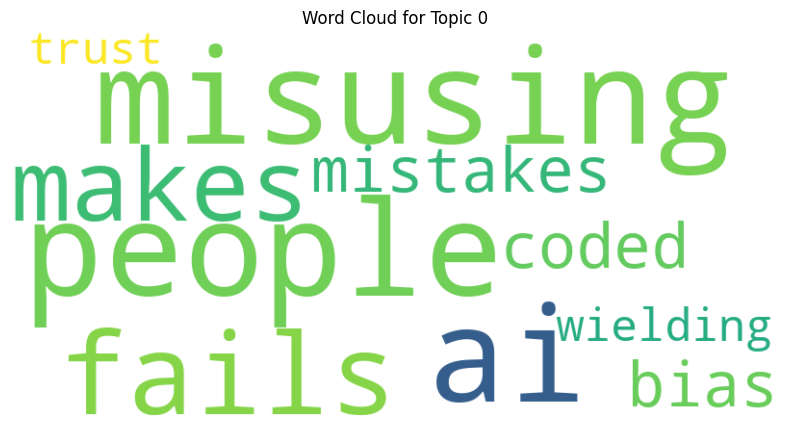

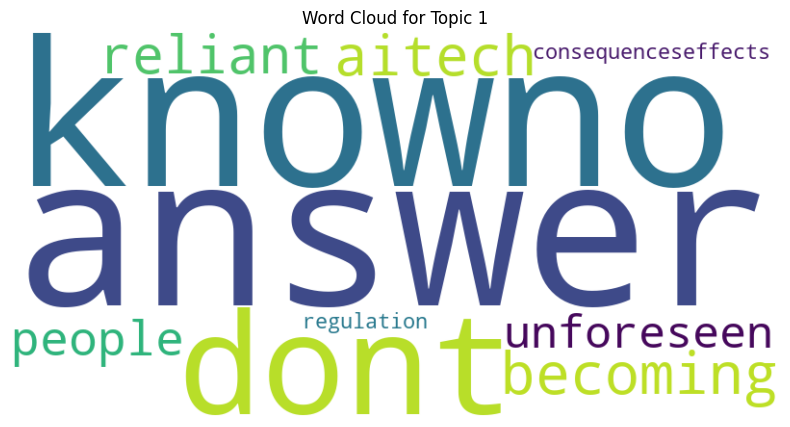

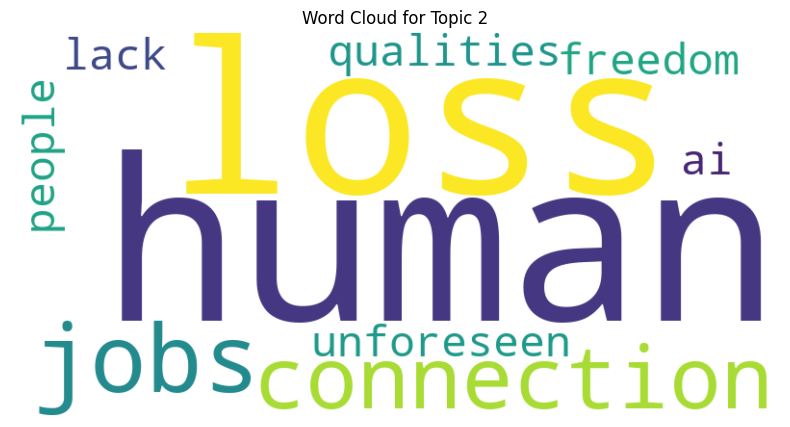

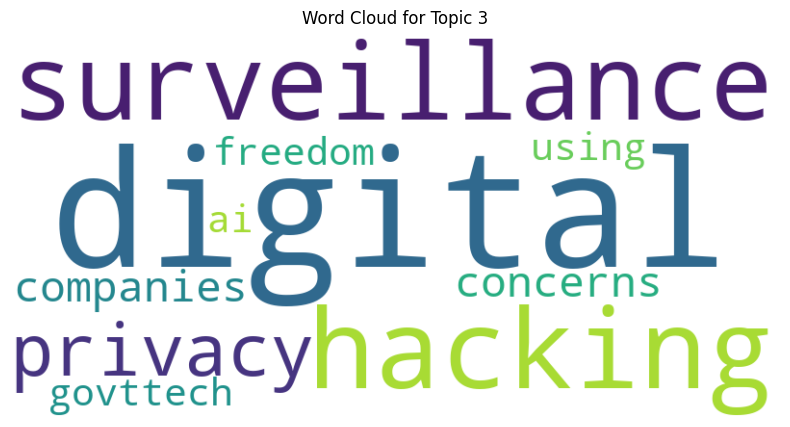

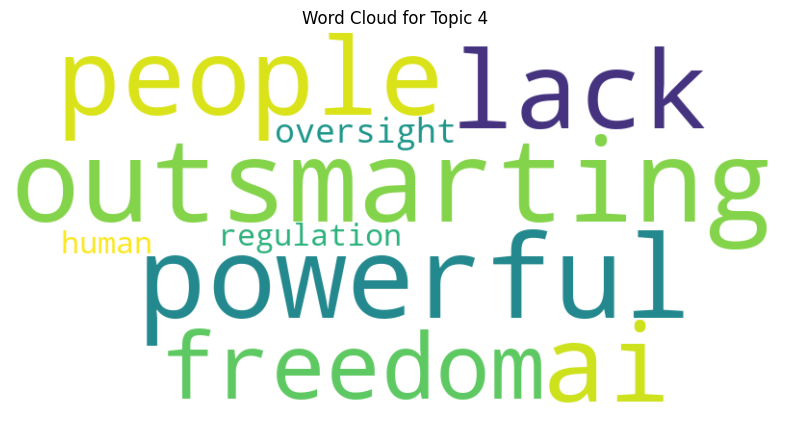

In [177]:
# topics
negative_topics = {
    0: "ai misusing people fails makes mistakes coded bias wielding trust",
    1: "answer knowno dont becoming aitech reliant people unforeseen consequenceseffects regulation",
    2: "human loss jobs connection qualities lack freedom people ai unforeseen",
    3: "digital hacking surveillance privacy companies concerns govttech using ai freedom",
    4: "get outsmarting powerful people ai lack freedom oversight regulation human"
}

# Function to generate word cloud for a given topic
def generate_wordcloud(topic_words, topic_number):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_number}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic
for topic_number, words in negative_topics.items():
    generate_wordcloud(words, topic_number)


In [178]:
# Check for missing values in each column
missing_values = df.isnull().sum()

In [179]:
# Print columns with missing values
print(missing_values)

Unnamed: 0             0
QKEY                   0
INTERVIEW_START_W99    0
INTERVIEW_END_W99      0
DEVICE_TYPE_W99        0
                      ..
F_INC_TIER2            0
WEIGHT_W99             0
Cluster                0
combined_text          0
processed_text         0
Length: 218, dtype: int64


In [180]:
# Display info about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 218 entries, Unnamed: 0 to processed_text
dtypes: datetime64[ns](2), float64(1), int32(7), int64(2), object(206)
memory usage: 16.8+ MB


In [181]:
# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Unnamed: 0             0
QKEY                   0
INTERVIEW_START_W99    0
INTERVIEW_END_W99      0
DEVICE_TYPE_W99        0
                      ..
F_INC_TIER2            0
WEIGHT_W99             0
Cluster                0
combined_text          0
processed_text         0
Length: 218, dtype: int64


In [182]:
# Display info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 218 entries, Unnamed: 0 to processed_text
dtypes: datetime64[ns](2), float64(1), int32(7), int64(2), object(206)
memory usage: 16.8+ MB


In [183]:
print(df.head())

   Unnamed: 0    QKEY INTERVIEW_START_W99   INTERVIEW_END_W99 DEVICE_TYPE_W99  \
0           0  100260 2021-11-03 14:25:27 2021-11-03 14:45:34       Laptop/PC   
1           1  100314 2021-11-04 12:35:35 2021-11-04 12:55:29      Smartphone   
2           2  100363 2021-11-03 20:23:43 2021-11-03 20:36:24      Smartphone   
3           3  100598 2021-11-02 13:01:05 2021-11-04 12:37:42       Laptop/PC   
4           4  100637 2021-11-02 12:32:58 2021-11-02 12:46:23       Laptop/PC   

  LANG_W99 FORM_W99    XTABLET_W99        TECH1_W99  \
0  English   Form 2  Non-tablet HH              NaN   
1  English   Form 1  Non-tablet HH  Mostly positive   
2  English   Form 1  Non-tablet HH  Mostly positive   
3  English   Form 2  Non-tablet HH              NaN   
4  English   Form 2  Non-tablet HH              NaN   

                               SC1_W99  ... F_INC_SDT1  \
0                      Mostly positive  ...          3   
1                                  NaN  ...          2   
2       

In [184]:
# Check for duplicates in 'QKEY' column
duplicates = df[df['QKEY'].duplicated(keep=False)]

# Display the rows with duplicate 'QKEY' values
print(duplicates)


Empty DataFrame
Columns: [Unnamed: 0, QKEY, INTERVIEW_START_W99, INTERVIEW_END_W99, DEVICE_TYPE_W99, LANG_W99, FORM_W99, XTABLET_W99, TECH1_W99, SC1_W99, CNCEXC_W99, EXCITEOE_W99_OE1, EXCITEOE_W99_OE2, EXCITEOE_W99_OE3, EXCITEOE_REFUSED_W99, CONCERNOE_W99_OE1, CONCERNOE_W99_OE2, CONCERNOE_W99_OE3, CONCERNOE_REFUSED_W99, ALGFAIR_W99, DISCRIM1_a_W99, DISCRIM1_b_W99, DISCRIM1_c_W99, DISCRIM1_d_W99, DISCRIM1_e_W99, DISCRIM1_f_W99, POSNEGAI_a_W99, POSNEGAI_b_W99, POSNEGAI_c_W99, POSNEGAI_d_W99, POSNEGAI_e_W99, POSNEGAI_f_W99, POSNEGHE_a_W99, POSNEGHE_b_W99, POSNEGHE_c_W99, POSNEGHE_d_W99, POSNEGHE_e_W99, POSNEGHE_f_W99, SMALG1_W99, SMALG2_W99, SMALG3_W99, SMALG4_a_W99, SMALG4_b_W99, SMALG4_c_W99, SMALG4_d_W99, SMALG5_W99, SMALG6_W99, SMALG7_W99, SMALG8_W99, SMALG9_a_W99, SMALG9_b_W99, SMALG9_c_W99, SMALG10_a_W99, SMALG10_b_W99, SMALG10_c_W99, SMALG11_W99, SMALG12_W99, SMALG13_a_W99, SMALG13_b_W99, SMALG13_c_W99, SMALG13_d_W99, FACEREC1_W99, FACEREC2_W99, FACEREC3_a_W99, FACEREC3_b_W99, FACE

In [185]:
#selecting specific columns and rows
demographic_df= df.iloc[:, 182:215]
demographic_df.head()

,F_RELCOM3CAT,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_HISP,F_HISP_ORIGIN,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,Medium,Metropolitan,West,Pacific,3,A man,College graduate+,1,No,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,3,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,Medium,Non-metropolitan,Midwest,East North Central,3,A man,Some College,6,No,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,2,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,Medium,Metropolitan,Northeast,Middle Atlantic,1,A woman,College graduate+,4,No,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,0,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,Medium,Metropolitan,West,Pacific,2,A woman,College graduate+,4,No,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,0,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,Medium,Metropolitan,South,South Atlantic,3,A woman,Some College,0,No,NaN,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,1,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [186]:
# Get the total number of columns in your demographic df
total_sample = len(demographic_df)
print(total_sample)

10260


In [187]:
# Iterate over each column index
for column_index in demographic_df:
    # Group by the current column
    #count = demographic_df.groupby(demographic_df.columns[column_index]).size()
    count = demographic_df.groupby(column_index).size()
    # Calculate percentage for each group
    percentage_count = (count / total_sample)*100

    # Print the result
    print(percentage_count)

    # Print an empty line
    print()

F_RELCOM3CAT
DK/Ref     0.740741
High      21.033138
Low       24.093567
Medium    54.132554
dtype: float64

F_METRO
Metropolitan        87.91423
Non-metropolitan    12.08577
dtype: float64

F_CREGION
Midwest      21.900585
Northeast    16.052632
South        39.298246
West         22.748538
dtype: float64

F_CDIVISION
East North Central    14.571150
East South Central     5.243665
Middle Atlantic       11.423002
Mountain               8.352827
New England            4.629630
Pacific               14.395712
South Atlantic        23.138402
West North Central     7.329435
West South Central    10.916179
dtype: float64

F_AGECAT
0     8.723197
1    32.436647
2    28.781676
3    29.707602
4     0.350877
dtype: float64

F_GENDER
A man                44.337232
A woman              54.853801
In some other way     0.584795
Refused               0.224172
dtype: float64

F_EDUCCAT
College graduate+        50.906433
H.S. graduate or less    17.017544
Refused                   0.311891
Some Colleg

In [188]:
#selecting specific columns and rows
general_perception_df= df.iloc[:, 8:36]
general_perception_df.head()

,TECH1_W99,SC1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,EXCITEOE_W99_OE3,EXCITEOE_REFUSED_W99,CONCERNOE_W99_OE1,CONCERNOE_W99_OE2,CONCERNOE_W99_OE3,...,POSNEGAI_a_W99,POSNEGAI_b_W99,POSNEGAI_c_W99,POSNEGAI_d_W99,POSNEGAI_e_W99,POSNEGAI_f_W99,POSNEGHE_a_W99,POSNEGHE_b_W99,POSNEGHE_c_W99,POSNEGHE_d_W99
0,NaN,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,Not asked,NaN,NaN,NaN,...,Very concerned,Equal excitement and concern,Very concerned,Equal excitement and concern,Somewhat concerned,Somewhat concerned,Somewhat excited,Somewhat concerned,Somewhat excited,Equal excitement and concern
1,Mostly positive,NaN,More excited than concerned,Don't know/No answer,NaN,NaN,Did not refuse,NaN,NaN,NaN,...,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Somewhat excited,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern,Equal excitement and concern
2,Mostly positive,NaN,Equally concerned and excited,NaN,NaN,NaN,Not asked,NaN,NaN,NaN,...,Somewhat concerned,Very excited,Somewhat concerned,Equal excitement and concern,Somewhat excited,Very concerned,Somewhat excited,Somewhat concerned,Very excited,Somewhat concerned
3,NaN,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,Not asked,NaN,NaN,NaN,...,Very concerned,Somewhat excited,Very concerned,Equal excitement and concern,Somewhat excited,Equal excitement and concern,Somewhat excited,Somewhat excited,Somewhat excited,Equal excitement and concern
4,NaN,Equal positive and negative effects,Equally concerned and excited,NaN,NaN,NaN,Not asked,NaN,NaN,NaN,...,Very concerned,Very excited,Very concerned,Very concerned,Somewhat excited,Somewhat concerned,Equal excitement and concern,Somewhat concerned,Very excited,Equal excitement and concern


In [189]:
# Iterate over each column
for column_name in general_perception_df.columns:
    # Group by the current column
    count = general_perception_df.groupby(column_name).size()

    # Calculate percentage for each group
    percentage_count = (count / total_sample) * 100

    # Print the result
    print(percentage_count)

    # Print an empty line
    print()


TECH1_W99
Equal positive and negative effects    19.844055
Mostly negative                         4.697856
Mostly positive                        25.604288
Refused                                 0.077973
dtype: float64

SC1_W99
Equal positive and negative effects    11.452242
Mostly negative                         2.553606
Mostly positive                        35.584795
Refused                                 0.185185
dtype: float64

CNCEXC_W99
Equally concerned and excited    44.805068
More concerned than excited      36.773879
More excited than concerned      18.060429
Refused                           0.360624
dtype: float64

EXCITEOE_W99_OE1
AI is interesting, exciting                              0.799220
Don't know/No answer                                     2.797271
Handles mundane, tedious tasks                           1.423002
Helps humans with difficult/dangerous tasks              0.711501
Helps those who are elderly/have a disability            0.516569
Helps with w

In [190]:
#selecting specific columns and rows
gene_editor_df= df.iloc[:, 139:161]
gene_editor_df.head()

,GENEV1_W99,GENEV2_W99,GENEV3_W99,GENEV4_a_W99,GENEV4_b_W99,GENEV4_c_W99,GENEV4_d_W99,GENEV5_W99,GENEV6_W99,GENEV7_W99,...,GENEV9_b_W99,GENEV9_c_W99,GENEV9_d_W99,GENEV10_W99,GENEV11_W99,GENEV12_a_W99,GENEV12_b_W99,GENEV12_c_W99,GENEV13_a_W99,GENEV13_b_W99
0,Nothing at all,Not sure,4,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,This idea is meddling with nature and crosses ...,Not feel pressure to get this for their baby,About the same as now,...,A minor role,A major role,A minor role,Government will go too far regulating their use,A higher standard than used for medical treatm...,More acceptable,No difference,No difference,Oppose,Not sure
1,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nothing at all,Not sure,4,Definitely would happen,Probably would happen,Probably would happen,Probably would happen,"As humans, we are always trying to better ours...",Feel pressure to get this for their baby,Better than now,...,A minor role,A minor role,A major role,Government will go too far regulating their use,A higher standard than used for medical treatm...,More acceptable,More acceptable,No difference,Favor,Favor
4,A little,Not sure,4,Definitely would happen,Probably would happen,Probably would happen,Probably would happen,This idea is meddling with nature and crosses ...,Feel pressure to get this for their baby,Better than now,...,A minor role,No role at all,A major role,Government will not go far enough regulating t...,A higher standard than used for medical treatm...,Less acceptable,More acceptable,More acceptable,Oppose,Favor


In [191]:
# Iterate over each column
for column_name in gene_editor_df.columns:
    # Group by the current column
    count = gene_editor_df.groupby(column_name).size()

    # Calculate percentage for each group
    percentage_count = (count / total_sample) * 100

    # Print the result
    print(percentage_count)

    # Print an empty line
    print()


GENEV1_W99
A little          25.536062
A lot              4.307992
Nothing at all    19.775828
Refused            0.155945
dtype: float64

GENEV2_W99
Bad idea for society     14.766082
Good idea for society    16.539961
Not sure                 18.206628
Refused                   0.263158
dtype: float64

GENEV3_W99
0    10.438596
1    11.968811
2     1.237817
3     7.943470
4    68.411306
dtype: float64

GENEV4_a_W99
Definitely would NOT happen     1.588694
Definitely would happen        23.957115
Probably would NOT happen       3.333333
Probably would happen          20.136452
Refused                         0.760234
dtype: float64

GENEV4_b_W99
Definitely would NOT happen     3.070175
Definitely would happen         6.569201
Probably would NOT happen      10.867446
Probably would happen          27.904483
Refused                         1.364522
dtype: float64

GENEV4_c_W99
Definitely would NOT happen     3.401559
Definitely would happen         8.255361
Probably would NOT happen    

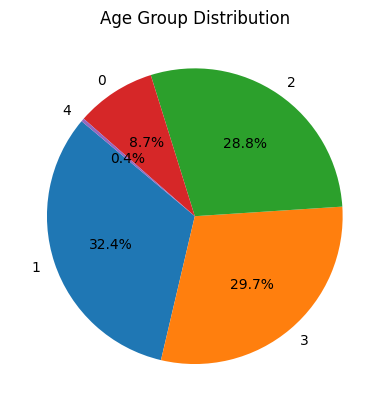

In [192]:
# Pie Chart
age_groups = demographic_df['F_AGECAT'].value_counts()
plt.pie(age_groups, labels=age_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.show()


In [193]:
df.groupby(['F_AGECAT', 'GENEV3_W99']).size()

F_AGECAT  GENEV3_W99
0         0               66
          1              104
          2                9
          3               62
          4              654
1         0              404
          1              430
          2               23
          3              289
          4             2182
2         0              339
          1              352
          2               39
          3              206
          4             2017
3         0              259
          1              337
          2               54
          3              257
          4             2141
4         0                3
          1                5
          2                2
          3                1
          4               25
dtype: int64

In [194]:
frequency_table= df.groupby(['F_AGECAT', 'F_EDUCCAT2','GENEV3_W99']).size().unstack()


In [195]:
# Calculate the total count for each group
total_counts = frequency_table.sum(axis=1)  # Sum along columns to get totals for each row

# Divide each cell by its respective total count and multiply by 100 to get percentages
percentage_table = (frequency_table.div(total_counts, axis=0) * 100).round(2)  # round to 2 decimal places

# Print or use percentage_table as needed
print(percentage_table)

GENEV3_W99               0      1      2      3       4
F_AGECAT F_EDUCCAT2                                    
0        0            5.83   8.74    NaN   7.77   77.67
         1            4.00  12.31   0.92   5.54   77.23
         2           11.38  12.20   2.44   1.63   72.36
         3           17.65  17.65   2.94  11.76   50.00
         4            7.38   7.38    NaN  12.30   72.95
         5             NaN    NaN    NaN    NaN  100.00
         6            9.68  13.44   1.08   8.06   67.74
1        0           12.09  11.50    NaN   8.26   68.14
         1           10.95  14.00   0.74   8.42   65.89
         2           16.15  12.56   1.03   8.21   62.05
         3           21.19  10.17   0.85  10.17   57.63
         4            8.72  12.55   0.43   9.36   68.94
         5            9.09  27.27   9.09   9.09   45.45
         6           15.17  13.10   1.03   8.28   62.41
2        0           13.62  11.44   0.82   6.27   67.85
         1            8.86  12.92   0.62   5.90 